# Customer Churn Prediction and Sales Dashboard - Code File
<div style="text-align: right;">
<h4>By Rishikesh M R and team (Group 9)
</div>

This Python Notebook focuses on:
* Understanding the data,
* Exploratory Data Analysis(EDA),
* Checking for null values/ duplicate values,
* Cleaning the data, and
* Creating visualizations out of it i.e. Conducting Univariate and Bivariate Analysis.

Additionally We:
* Handling Outliers
* Feature Extraction
* Feature Engineering
* Model Building like Random forest, XGBoost, Decision Tree etc.
* Hyperparameter tuning


<h5>Use the Below code incase for you are using Google colab.</h5>
Connection with google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/CSV/DS_DSBA.xlsx'

### Import libaries

In [ ]:
# Library required to suppress any warning messages

import warnings

warnings.filterwarnings("ignore")

# Libraries required for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)  # adds background to the graph

# Remove the limit for number of displayed rows and columns
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [ ]:
# Libraries required for data preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Library required to split the data
from sklearn.model_selection import train_test_split

In [ ]:
# Libraries required to build models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

# Libraries required for hyperparameter tuning
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV,
    cross_val_score,
    StratifiedKFold,
)

# Libraries to get different metric scores
# from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
)

### Reading the dataset

In [ ]:
#reffer the below data
#https://docs.google.com/spreadsheets/d/1x9gJUNZQ4cOQpgE_oZ8KIJXVcX3xWw9z/edit?usp=sharing&ouid=118278145072997996979&rtpof=true&sd=true => google drive of excel

customer_churn_data = pd.read_excel(path, sheet_name="E Comm",)

In [ ]:
# creating a copy of the dataset
data = customer_churn_data.copy()

In [ ]:
# Checking the number of rows and columns in the data

data.shape

(11260, 19)

### Viewing 10 random observations from the dataset

In [ ]:
data.sample(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
8570,28570,1,1,1.00,21.00,Credit Card,Male,4.00,4,HNI,3.00,Married,10,0.00,14,2,1,227,Computer
1681,21681,1,0,1.00,14.00,UPI,Male,3.00,5,Regular Plus,5.00,Married,2,1.00,11,0,7,121,Mobile
1094,21094,0,2,1.00,15.00,Credit Card,Female,2.00,3,Regular Plus,3.00,Married,10,0.00,17,1,2,130,Mobile
6676,26676,1,3,1.00,16.00,NaN,M,3.00,3,Regular Plus,5.00,Single,5,1.00,15,0,3,128,&&&&
8533,28533,0,25,1.00,20.00,Debit Card,Male,3.00,5,HNI,4.00,Divorced,11,0.00,18,2,8,251,Mobile
4756,24756,0,9,1.00,7.00,Debit Card,Female,3.00,2,Regular Plus,3.00,Single,5,0.00,14,3,3,150,Mobile
4866,24866,1,4,3.00,31.00,Debit Card,Female,4.00,2,Super Plus,4.00,Single,6,1.00,17,2,1,257,Computer
3699,23699,0,31,1.00,7.00,Credit Card,Female,4.00,4,Regular,5.00,Divorced,5,1.00,22,2,6,322,Mobile
7223,27223,0,10,1.00,10.00,Credit Card,Female,2.00,4,Regular Plus,5.00,Married,3,0.00,14,0,2,NaN,Mobile
705,20705,0,14,1.00,18.00,Debit Card,Male,2.00,3,Regular Plus,2.00,Divorced,4,1.00,11,1,0,148,Mobile


### Checking the data types of the columns in the dataset

In [ ]:
# Checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

### Checking for duplicated values

In [ ]:
data.duplicated().sum()

0

### Checking for the number of missing values in the dataset

In [ ]:
MissingValues = [data.isnull().sum()] + ['--------------------------------------'] + [ data.isnull().sum() / data.isnull().count() * 100]
MissingValues

[AccountID                    0
 Churn                        0
 Tenure                     102
 City_Tier                  112
 CC_Contacted_LY            102
 Payment                    109
 Gender                     108
 Service_Score               98
 Account_user_count         112
 account_segment             97
 CC_Agent_Score             116
 Marital_Status             212
 rev_per_month              102
 Complain_ly                357
 rev_growth_yoy               0
 coupon_used_for_payment      0
 Day_Since_CC_connect       357
 cashback                   471
 Login_device               221
 dtype: int64,
 '--------------------------------------',
 AccountID                 0.00
 Churn                     0.00
 Tenure                    0.91
 City_Tier                 0.99
 CC_Contacted_LY           0.91
 Payment                   0.97
 Gender                    0.96
 Service_Score             0.87
 Account_user_count        0.99
 account_segment           0.86
 CC_Agent_Scor

### Checking the number of unique values in each column

In [ ]:
data.nunique()

AccountID                  11260
Churn                          2
Tenure                        38
City_Tier                      3
CC_Contacted_LY               44
Payment                        5
Gender                         4
Service_Score                  6
Account_user_count             7
account_segment                7
CC_Agent_Score                 5
Marital_Status                 3
rev_per_month                 59
Complain_ly                    2
rev_growth_yoy                20
coupon_used_for_payment       20
Day_Since_CC_connect          24
cashback                     321
Login_device                   3
dtype: int64

### Data Cleaning and Pre-processing	
a) Removal of unwanted variables<br>
b) Missing Value treatment <br>
d) Outlier treatment <br>
e) Variable transformation <br>
f) Addition of new variables <br>

### Remove column name 'AccountID' as it as simply a index for the dataset

In [ ]:
# data.drop(['AccountID'], axis=1)
data.drop("AccountID",axis=1,inplace=True)

In [ ]:
data.shape

(11260, 18)

The data has 11260 observations with 18 variables, of which there are a few nulls in some of the variables' observations. The independent variables have both numerical and categorical data, and the churn variable is considered the target variable. The table below describes the numerical data with a few necessary details:

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
City_Tier,11148.00,1.65,0.92,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,11158.00,17.87,8.85,4.00,11.00,16.00,23.00,132.00
Service_Score,11162.00,2.90,0.73,0.00,2.00,3.00,3.00,5.00
CC_Agent_Score,11144.00,3.07,1.38,1.00,2.00,3.00,4.00,5.00
Complain_ly,10903.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00


### b) Missing Value treatment (if applicable)

In [ ]:
data.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

<h5>Churn, rev_growth_yoy, and coupon_used_for_payment has no null values

<h4>Tenure

In [ ]:
data.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [ ]:
data.Tenure.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1     12.1%
0     11.0%
8      4.7%
9      4.4%
7      4.0%
10     3.8%
3      3.7%
5      3.6%
4      3.6%
11     3.5%
6      3.3%
12     3.2%
13     3.2%
2      3.2%
14     3.1%
15     2.8%
16     2.6%
19     2.4%
18     2.3%
20     1.9%
17     1.9%
21     1.5%
23     1.5%
22     1.4%
24     1.3%
28     1.2%
30     1.2%
27     1.2%
99     1.2%
26     1.1%
#      1.0%
25     1.0%
29     1.0%
31     0.9%
50     0.0%
60     0.0%
51     0.0%
61     0.0%
Name: Tenure, dtype: object

 Variable transformation

In [ ]:

data['Tenure'].replace({'#':1}, inplace=True)


Filling null values

In [ ]:

data["Tenure"].fillna(1, inplace = True)

<h4>City_Tier

In [ ]:
data.City_Tier.unique()

array([ 3.,  1., nan,  2.])

In [ ]:
data.City_Tier.value_counts()

1.00    7263
3.00    3405
2.00     480
Name: City_Tier, dtype: int64

In [ ]:
#filling null values
data["City_Tier"].fillna(1, inplace = True)

In [ ]:
data.City_Tier.unique()

array([3., 1., 2.])

<h4>CC_Contacted_LY

In [ ]:
data.CC_Contacted_LY.unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [ ]:
data.CC_Contacted_LY.value_counts()

14.00     682
16.00     663
9.00      655
13.00     655
15.00     623
12.00     571
8.00      538
17.00     525
11.00     524
10.00     489
7.00      391
18.00     374
19.00     364
20.00     319
6.00      311
21.00     310
22.00     282
23.00     241
24.00     214
25.00     197
32.00     192
29.00     181
28.00     178
34.00     178
30.00     175
27.00     174
26.00     169
35.00     165
31.00     165
33.00     155
36.00     148
37.00      96
38.00      73
39.00      55
40.00      46
42.00      30
41.00      29
43.00       8
5.00        8
127.00      1
126.00      1
132.00      1
4.00        1
129.00      1
Name: CC_Contacted_LY, dtype: int64

In [ ]:
data.CC_Contacted_LY.mean()

17.867090876501166

In [ ]:
#filling null values
data["CC_Contacted_LY"].fillna(17, inplace = True)

In [ ]:
data.CC_Contacted_LY.unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  34.,   5.,   4., 126.,   7.,
        36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43., 129.])

<h4>Payment

In [ ]:
data.Payment.unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [ ]:
data.Payment.value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [ ]:
#filling null values
data["Payment"].fillna('Debit Card', inplace = True)

In [ ]:
data.Payment.value_counts()

Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

<h4>Gender

In [ ]:
data.Gender.unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [ ]:
data.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [ ]:
#  Variable transformation and Removal of unwanted variables : Because Female and F, Male and M are the same entity, they have been merged as F as Female and M as Male.
data["Gender"] = data["Gender"].replace("F", "Female")
data["Gender"] = data["Gender"].replace("M", "Male")

In [ ]:
#filling null values
data["Gender"].fillna('Male', inplace = True)

In [ ]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data.Gender.value_counts()

Male      6812
Female    4448
Name: Gender, dtype: int64

<h4>Service_Score

In [ ]:
data.Service_Score.unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [ ]:
data.Service_Score.value_counts()

3.00    5490
2.00    3251
4.00    2331
1.00      77
0.00       8
5.00       5
Name: Service_Score, dtype: int64

In [ ]:
data.Service_Score.mean()

2.9025264289553845

In [ ]:
#filling null values
data["Service_Score"].fillna(3, inplace = True)

In [ ]:
data.Service_Score.unique()

array([3., 2., 1., 0., 4., 5.])

<h4>Account_user_count

In [ ]:
data.Account_user_count .unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [ ]:
data.Account_user_count.value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [ ]:
#filling null values
data["Account_user_count"].fillna(4, inplace = True)

In [ ]:
#  Variable transformation
data['Account_user_count'].replace({'@':4}, inplace=True)


In [ ]:
data.Account_user_count.value_counts()

<h4>account_segment

In [ ]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [ ]:
data.account_segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [ ]:
#  Variable transformation and Removal of unwanted variables : Because Regular plus and Regular +, Super Plus and Super + are the same entity, they have been merge.
data["account_segment"] = data["account_segment"].replace("Regular +", "Regular Plus")
data["account_segment"] = data["account_segment"].replace("Super +", "Super Plus")

In [ ]:
#filling null values
data["account_segment"].fillna('Super', inplace = True)

In [ ]:
data.account_segment.value_counts()

Super           4159
Regular Plus    4124
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [ ]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus'],
      dtype=object)

<h4>CC_Agent_Score

In [ ]:
data.CC_Agent_Score.unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [ ]:
data.CC_Agent_Score.value_counts()

3.00    3360
1.00    2302
5.00    2191
4.00    2127
2.00    1164
Name: CC_Agent_Score, dtype: int64

In [ ]:
data.CC_Agent_Score.mean()

3.0664931801866477

In [ ]:
#filling null values
data["CC_Agent_Score"].fillna(3, inplace = True)

In [ ]:
data.CC_Agent_Score.value_counts()

3.00    3476
1.00    2302
5.00    2191
4.00    2127
2.00    1164
Name: CC_Agent_Score, dtype: int64

In [ ]:
data.CC_Agent_Score.unique()

array([2., 3., 5., 4., 1.])

<h4>Marital_Status

In [ ]:
data.Marital_Status.unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [ ]:
data.Marital_Status.value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [ ]:
#filling null values
data["Marital_Status"].fillna('Married', inplace = True)

In [ ]:
data.Marital_Status.value_counts()

Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [ ]:
data.Marital_Status.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

<h4>rev_per_month

In [ ]:
data.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [ ]:
data.rev_per_month.value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
123       5
124       5
107       5
136       4
140       4
118       4
133       4
129       4
115       3
117       3
138       3
101       3
110       3
137       3
119       3
108       3
127       3
116       3
126       3
130       3
113       3
120       2
19        2
131       2
139       2
114       2
125       2
22        2
121       2
105       2
134       2
20        1
23        1
122       1
21        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: rev_per_month, dtype: int64

In [ ]:
#filling null values
data["rev_per_month"].fillna(3, inplace = True)

In [ ]:
#  Variable transformation
data['rev_per_month'].replace({'+':3}, inplace=True)

In [ ]:
data.rev_per_month.unique()

array([  9,   7,   6,   8,   3,   2,   4,  10,   1,   5, 130,  19, 139,
       102, 120, 138, 127, 123, 124, 116,  21, 126, 134, 113, 114, 108,
       140, 133, 129, 107, 118,  11, 105,  20, 119, 121, 137, 110,  22,
       101, 136, 125,  14,  13,  12, 115,  23, 122, 117, 131, 104,  15,
        25, 135, 111, 109, 100, 103])

<h4>Complain_ly

In [ ]:
data.Complain_ly.unique()

array([ 1.,  0., nan])

In [ ]:
data.Complain_ly.value_counts()

0.00    7792
1.00    3111
Name: Complain_ly, dtype: int64

In [ ]:
data["Complain_ly"].fillna(0, inplace = True)

In [ ]:
data.Complain_ly.unique()

array([1., 0.])

In [ ]:
data.Complain_ly.value_counts()

0.00    8149
1.00    3111
Name: Complain_ly, dtype: int64

<h4>rev_growth_yoy

In [ ]:
data.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [ ]:
data.rev_growth_yoy.value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [ ]:
#  Variable transformation
data['rev_growth_yoy'].replace({'$':14}, inplace=True)

In [ ]:
data.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,  4,
       27, 28])

In [ ]:
data.rev_growth_yoy.value_counts()

14    1527
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
4        3
Name: rev_growth_yoy, dtype: int64

<h4>coupon_used_for_payment

In [ ]:
data.coupon_used_for_payment.unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [ ]:
data.coupon_used_for_payment.value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [ ]:
#  Variable transformation
data['coupon_used_for_payment'].replace({'#':1}, inplace=True)
data['coupon_used_for_payment'].replace({'$':1}, inplace=True)
data['coupon_used_for_payment'].replace({'*':1}, inplace=True)

In [ ]:
data.coupon_used_for_payment.unique()

array([ 1,  0,  4,  2,  9,  6, 11,  7, 12, 10,  5,  3, 13, 15,  8, 14, 16])

In [ ]:
data.coupon_used_for_payment.value_counts()

1     4376
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
Name: coupon_used_for_payment, dtype: int64

<h4>Day_Since_CC_connect

In [ ]:
data.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [ ]:
data.Day_Since_CC_connect.value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
$        1
46       1
Name: Day_Since_CC_connect, dtype: int64

In [ ]:
#  Variable transformation
data['Day_Since_CC_connect'].replace({'$':3}, inplace=True)

In [ ]:
#filling null values
data["Day_Since_CC_connect"].fillna(3, inplace = True)

In [ ]:
data.Day_Since_CC_connect.unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., 11., 10.,  9.,
       13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [ ]:
data.Day_Since_CC_connect.value_counts()

3.00     2174
2.00     1574
1.00     1256
8.00     1169
0.00      964
7.00      911
4.00      893
9.00      622
5.00      479
10.00     339
6.00      229
11.00     183
12.00     146
13.00     117
14.00      74
15.00      37
17.00      34
16.00      26
18.00      26
30.00       2
31.00       2
47.00       2
46.00       1
Name: Day_Since_CC_connect, dtype: int64

<h4>cashback

In [ ]:
data.cashback.unique()

array([160, 121, nan, 134, 130, 139, 123, 127, 295, 154, 196, 129, 157,
       161, 150, 162, 203, 117, 207, 142, 173, 190, 143, 1974, 133, 209,
       122, 120, 194, 126, 299, 125, 187, 131, 111, 205, 145, 128, 290,
       287, 195, 237, 300, 159, 268, 136, 144, 153, 166, 163, 168, 138,
       167, 176, 149, 204, 185, 200, 225, 236, 189, 222, 206, 0, 179, 188,
       124, 132, 292, 261, 291, 137, 1955, 164, 165, 169, 294, 135, 152,
       269, 156, 140, 235, 218, 220, 276, 146, 147, 158, 114, 180, 155,
       260, 112, 221, 148, 219, 271, 1813, 175, 151, 293, 283, 215, 171,
       183, 1862, 197, 267, 243, 1982, 184, 266, 296, 280, 241, 270, 279,
       191, 198, 141, 232, 174, 262, 216, 119, 282, 254, 177, 110, 113,
       186, 212, 248, 217, 238, 211, '$', 284, 116, 272, 202, 263, 208,
       249, 178, 274, 240, 1840, 210, 227, 298, 233, 277, 234, 275, 231,
       182, 286, 1920, 278, 297, 288, 1908, 281, 1865, 1945, 199, 273,
       247, 193, 264, 192, 201, 1843, 1803, 1844, 252, 1

In [ ]:
data.cashback.value_counts()

152     208
153     207
148     204
154     188
149     185
       ... 
1928      1
1982      1
1826      1
1955      1
1882      1
Name: cashback, Length: 321, dtype: int64

In [ ]:
data['cashback'].replace({'$':152}, inplace=True)
data["cashback"].fillna(152, inplace = True)

In [ ]:
data.cashback.unique()

array([ 160.,  121.,  152.,  134.,  130.,  139.,  123.,  127.,  295.,
        154.,  196.,  129.,  157.,  161.,  150.,  162.,  203.,  117.,
        207.,  142.,  173.,  190.,  143., 1974.,  133.,  209.,  122.,
        120.,  194.,  126.,  299.,  125.,  187.,  131.,  111.,  205.,
        145.,  128.,  290.,  287.,  195.,  237.,  300.,  159.,  268.,
        136.,  144.,  153.,  166.,  163.,  168.,  138.,  167.,  176.,
        149.,  204.,  185.,  200.,  225.,  236.,  189.,  222.,  206.,
          0.,  179.,  188.,  124.,  132.,  292.,  261.,  291.,  137.,
       1955.,  164.,  165.,  169.,  294.,  135.,  269.,  156.,  140.,
        235.,  218.,  220.,  276.,  146.,  147.,  158.,  114.,  180.,
        155.,  260.,  112.,  221.,  148.,  219.,  271., 1813.,  175.,
        151.,  293.,  283.,  215.,  171.,  183., 1862.,  197.,  267.,
        243., 1982.,  184.,  266.,  296.,  280.,  241.,  270.,  279.,
        191.,  198.,  141.,  232.,  174.,  262.,  216.,  119.,  282.,
        254.,  177.,

In [ ]:
data.cashback.value_counts()

152.00     681
153.00     207
148.00     204
154.00     188
149.00     185
          ... 
37.00        1
1928.00      1
1839.00      1
1974.00      1
1882.00      1
Name: cashback, Length: 320, dtype: int64

<h4>Login_device

In [ ]:
data.Login_device.unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [ ]:
data.Login_device.value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [ ]:
#  Variable transformation
data['Login_device'].replace({'&&&&':'others'}, inplace=True)

#  Filling null values
data["Login_device"].fillna('Mobile', inplace = True)

In [ ]:
data.Login_device.unique()

array(['Mobile', 'Computer', 'others'], dtype=object)

In [ ]:
data.Login_device.value_counts()

Mobile      7703
Computer    3018
others       539
Name: Login_device, dtype: int64

<h3>Checking for null values after Variable transformation, handling missing and eleminating null values

In [ ]:
data.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
Tenure,11260.00,10.83,12.83,0.00,2.00,8.00,16.00,99.00
City_Tier,11260.00,1.65,0.91,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,11260.00,17.86,8.81,4.00,11.00,16.00,23.00,132.00
Service_Score,11260.00,2.90,0.72,0.00,2.00,3.00,3.00,5.00
Account_user_count,11260.00,3.70,1.00,1.00,3.00,4.00,4.00,6.00
CC_Agent_Score,11260.00,3.07,1.37,1.00,2.00,3.00,4.00,5.00
rev_per_month,11260.00,6.13,11.52,1.00,3.00,4.00,7.00,140.00
Complain_ly,11260.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
rev_growth_yoy,11260.00,16.19,3.76,4.00,13.00,15.00,19.00,28.00


In [ ]:
# plt.subplot(2, 3, 1)
# plt.subplot(2, 3, 2)
# plt.subplot(2, 3, 3)
# plt.subplot(2, 3, 4)
# plt.subplot(2, 3, 5)
# plt.subplot(2, 3, 6)


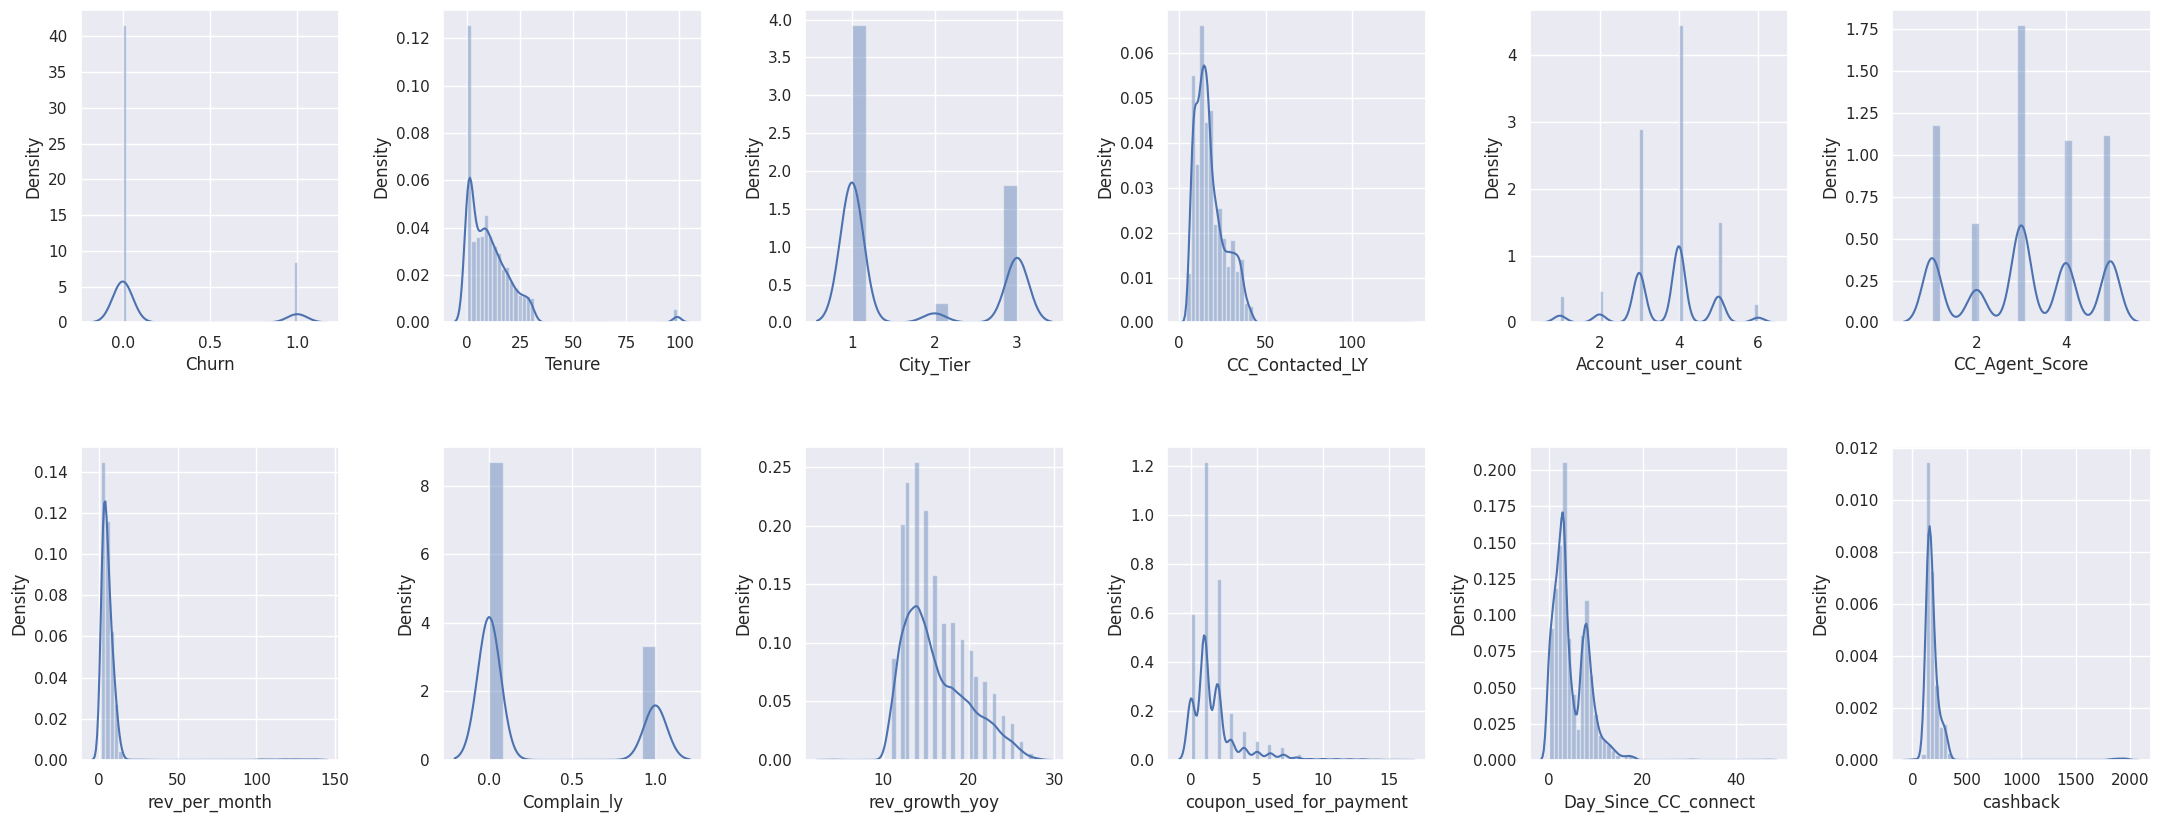

In [ ]:
plt.figure(figsize=(23,5))
plt.subplot(2, 6, 1)
sns.distplot(data['Churn'])

plt.subplot(2, 6, 2)
sns.distplot(data['Tenure'])

plt.subplot(2, 6, 3)
sns.distplot(data['City_Tier'])

plt.subplot(2, 6, 4)
sns.distplot(data['CC_Contacted_LY'])

plt.subplot(2, 6, 5)
sns.distplot(data['Account_user_count'])

plt.subplot(2, 6, 6)
sns.distplot(data['CC_Agent_Score'])


plt.subplot(2, 6, 7)
sns.distplot(data['rev_per_month'])

plt.subplot(2, 6, 8)
sns.distplot(data['Complain_ly'])

plt.subplot(2, 6, 9)
sns.distplot(data['rev_growth_yoy'])

plt.subplot(2, 6, 10)
sns.distplot(data['coupon_used_for_payment'])

plt.subplot(2, 6, 11)
sns.distplot(data['Day_Since_CC_connect'])

plt.subplot(2, 6, 12)
sns.distplot(data['cashback'])

plt.subplots_adjust(left=0.1,
                    bottom=0.5,
                    right=1,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

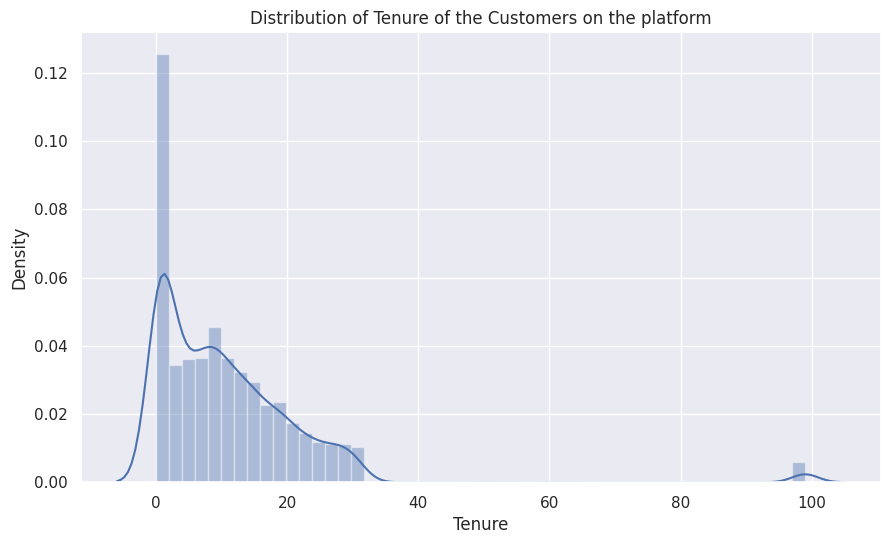

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Tenure of the Customers on the platform")
sns.distplot(data['Tenure'])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)



Categorical Variables:


Payment                    

Gender                     

account_segment             

Marital_Status             


Login_device  

In [ ]:
# summary of the categorical variables

data.describe(include="object").T

,count,unique,top,freq
Payment,11260,5,Debit Card,4696
Gender,11260,2,Male,6812
account_segment,11260,5,Super,4159
Marital_Status,11260,3,Married,6072
Login_device,11260,3,Mobile,7703


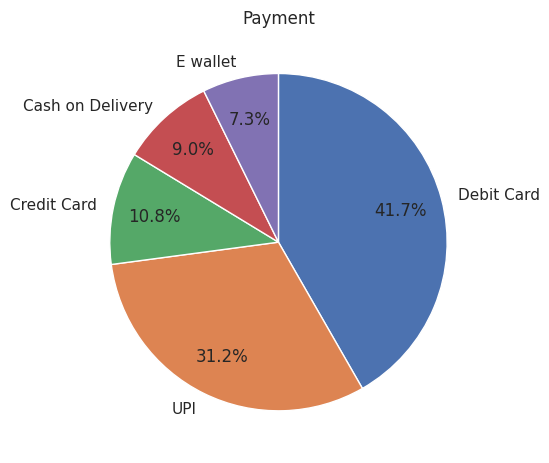

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['unhcrpyplotstyle','pie'])



#compute data for plotting
labels = data['Payment'].unique()
values = data.Payment.value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Payment')

#set chart source and copyright
plt.annotate('', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

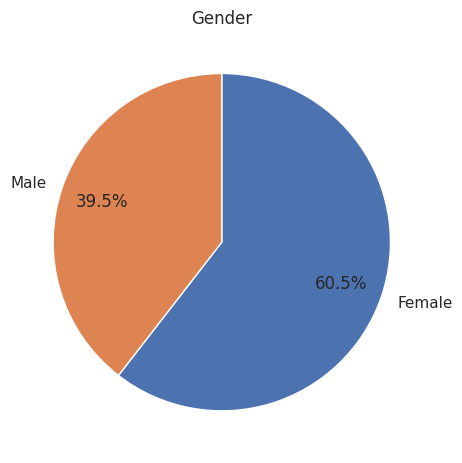

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['unhcrpyplotstyle','pie'])



#compute data for plotting
labels = data['Gender'].unique()
values = data.Gender.value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Gender')

#set chart source and copyright
plt.annotate('', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

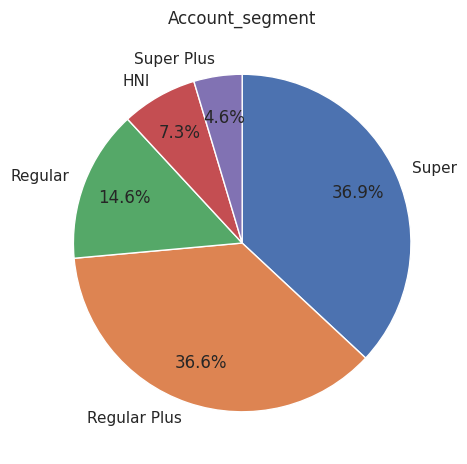

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['unhcrpyplotstyle','pie'])



#compute data for plotting
labels = data['account_segment'].unique()
values = data.account_segment.value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Account_segment')

#set chart source and copyright
plt.annotate('', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

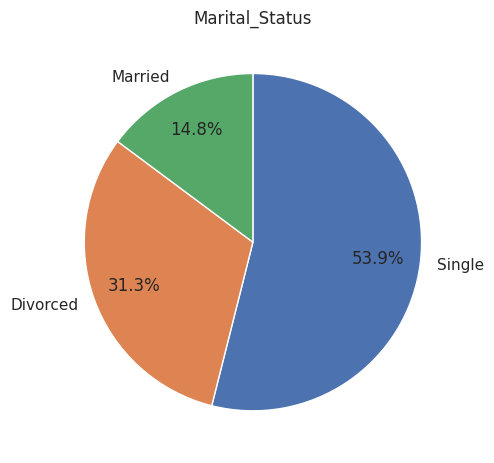

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['unhcrpyplotstyle','pie'])



#compute data for plotting
labels = data['Marital_Status'].unique()
values = data.Marital_Status.value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Marital_Status')

#set chart source and copyright
plt.annotate('', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

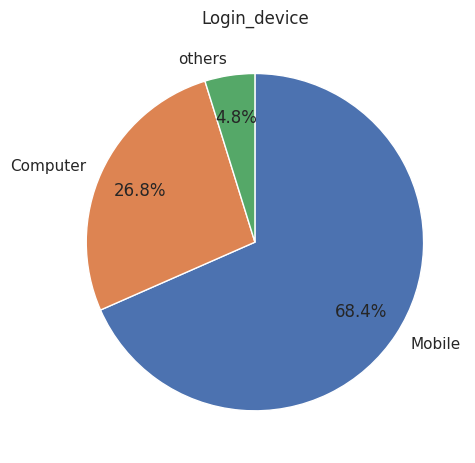

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['unhcrpyplotstyle','pie'])



#compute data for plotting
labels = data['Login_device'].unique()
values = data.Login_device.value_counts()

#plot the chart
fig, ax = plt.subplots()
pie=ax.pie(values, labels=labels, autopct='%1.1f%%', pctdistance = 0.75, counterclock=False, startangle=-270)

#set chart title
ax.set_title('Login_device')

#set chart source and copyright
plt.annotate('', (0,0), (0, -25), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
plt.annotate('', (0,0), (0, -35), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)

#adjust chart margin and layout
fig.tight_layout()

#show chart
plt.show()

Bivariate Analysis

In [ ]:
# Defining a method to plot stacked bar plot


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data : dataframe
    predictor : independent variable
    target : target variable

    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="lower left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)




    plt.show()

In [ ]:
# Target variable vs. Numerical variables:

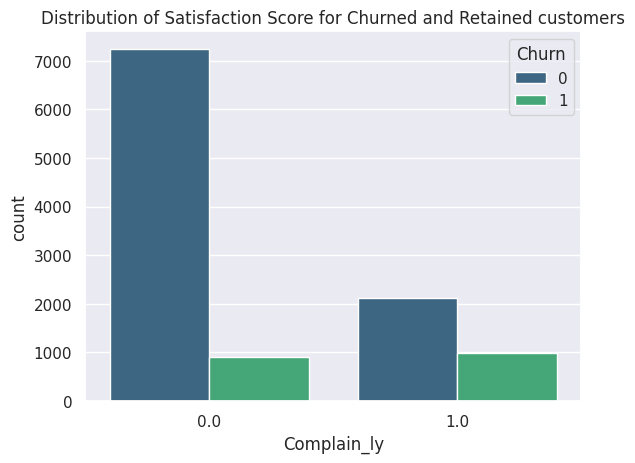

In [ ]:
sns.countplot(x='Complain_ly', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()



Churn      0     1    All
Tenure                   
All     9364  1896  11260
1.0      851   718   1569
0.0      562   669   1231
3.0      367    43    410
4.0      360    43    403
7.0      418    32    450
2.0      322    32    354
20.0     187    30    217
5.0      373    30    403
8.0      490    29    519
10.0     396    27    423
14.0     320    25    345
13.0     334    25    359
99.0     107    24    131
19.0     249    24    273
9.0      475    21    496
15.0     291    20    311
21.0     150    20    170
11.0     368    20    388
16.0     272    19    291
6.0      348    15    363
12.0     347    13    360
18.0     242    11    253
17.0     209     6    215
30.0     137     0    137
61.0       2     0      2
60.0       2     0      2
51.0       2     0      2
50.0       2     0      2
31.0      96     0     96
26.0     122     0    122
29.0     114     0    114
28.0     137     0    137
27.0     131     0    131
25.0     114     0    114
24.0     147     0    147
22.0     151

<Figure size 1000x500 with 0 Axes>

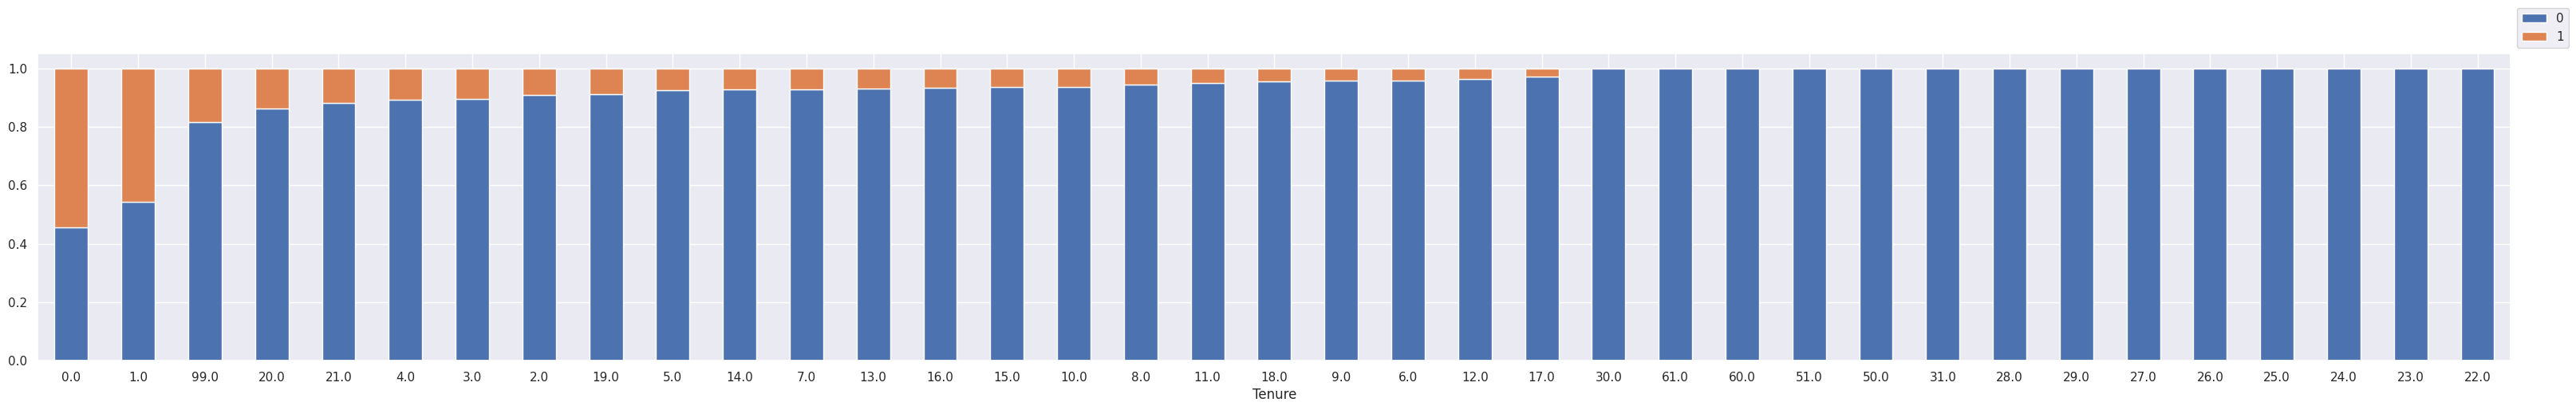

In [ ]:
# 2. Target(Churn) vs Tenure
#set chart title
plt.figure(figsize=(10,5))
stacked_barplot(data, "Tenure", "Churn")

Complain_ly   0.0   1.0    All
Churn                         
All          8149  3111  11260
0            7241  2123   9364
1             908   988   1896


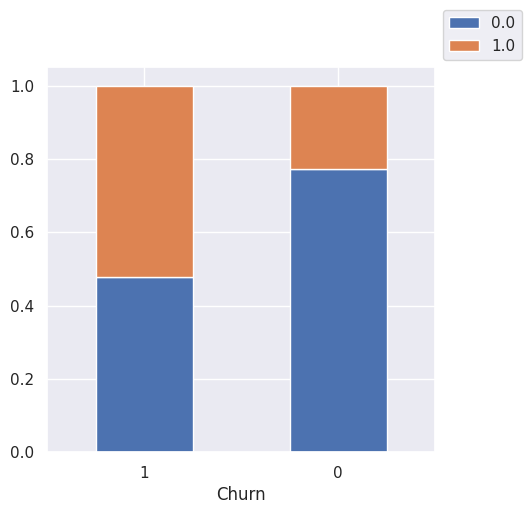

In [ ]:
# 2. Target(Churn) vs Tenure
#set chart title

stacked_barplot(data, "Churn", "Complain_ly")


Churn                0     1    All
Payment                            
All               9364  1896  11260
Debit Card        3972   724   4696
Credit Card       3012   499   3511
E wallet           941   276   1217
Cash on Delivery   760   254   1014
UPI                679   143    822


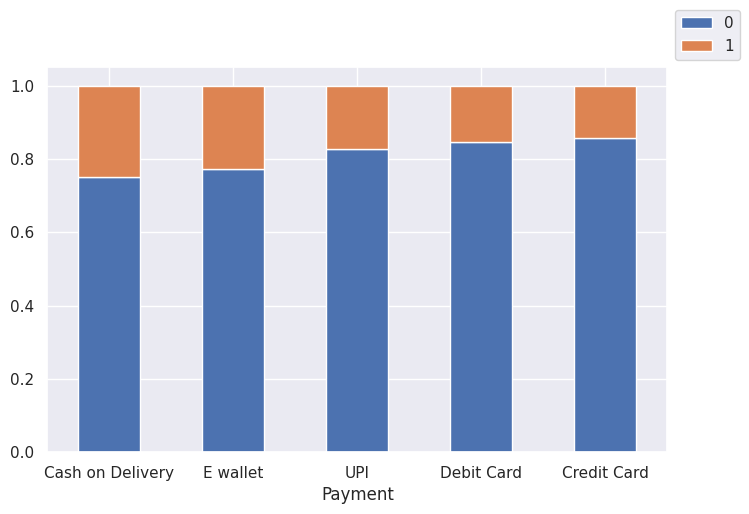

In [ ]:
# 2. Target(Churn) vs Payment
stacked_barplot(data, "Payment", "Churn")

Churn            0     1    All
Login_device                   
All           9364  1896  11260
Mobile        6489  1214   7703
Computer      2421   597   3018
others         454    85    539


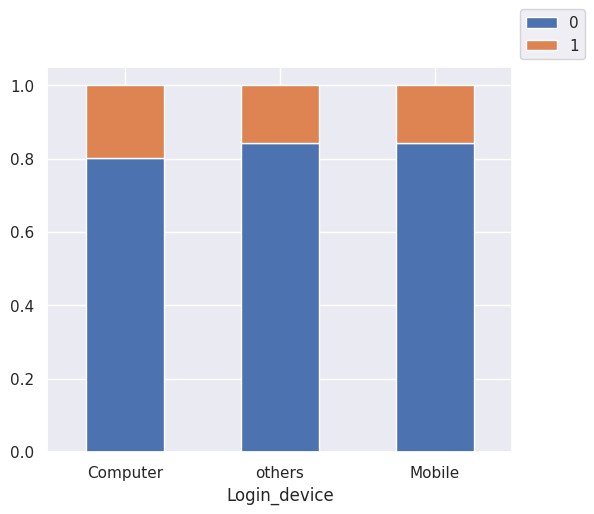

In [ ]:
# 2. Target(Churn) vs Payment
stacked_barplot(data, "Login_device", "Churn")

Churn              0     1    All
CC_Agent_Score                   
All             9364  1896  11260
3.0             2877   599   3476
5.0             1669   522   2191
4.0             1763   364   2127
1.0             2038   264   2302
2.0             1017   147   1164


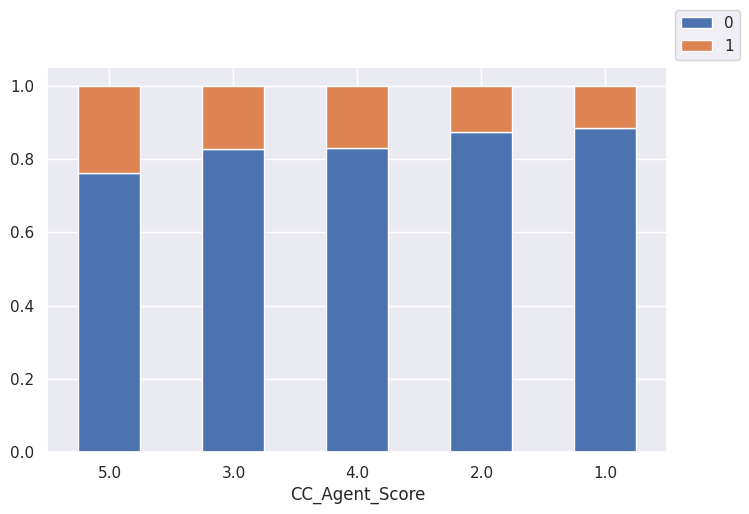

In [ ]:
stacked_barplot(data, "CC_Agent_Score", "Churn")

Churn         0     1    All
City_Tier                   
All        9364  1896  11260
1.0        6302  1073   7375
3.0        2678   727   3405
2.0         384    96    480


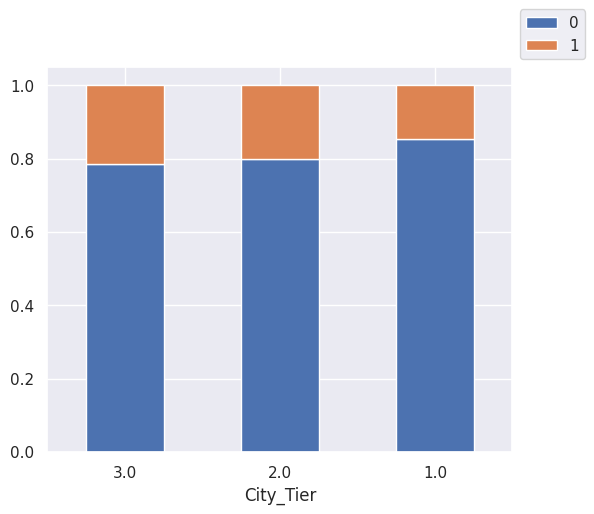

In [ ]:
stacked_barplot(data, "City_Tier", "Churn")

Churn              0     1    All
Marital_Status                   
All             9364  1896  11260
Single          2573   947   3520
Married         5367   705   6072
Divorced        1424   244   1668


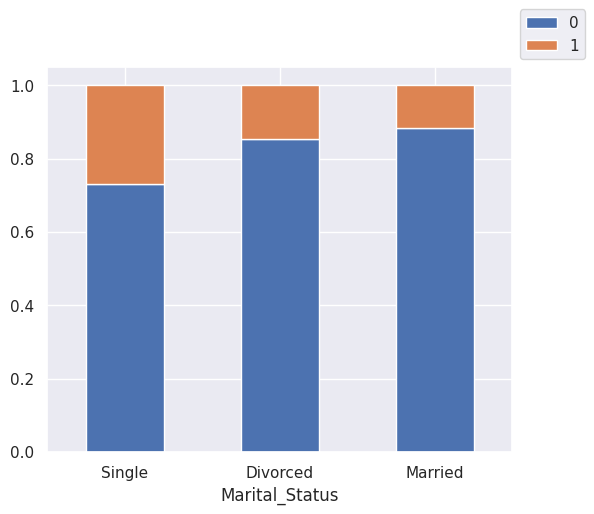

In [ ]:

stacked_barplot(data, "Marital_Status", "Churn")

Corelation

<Axes: >

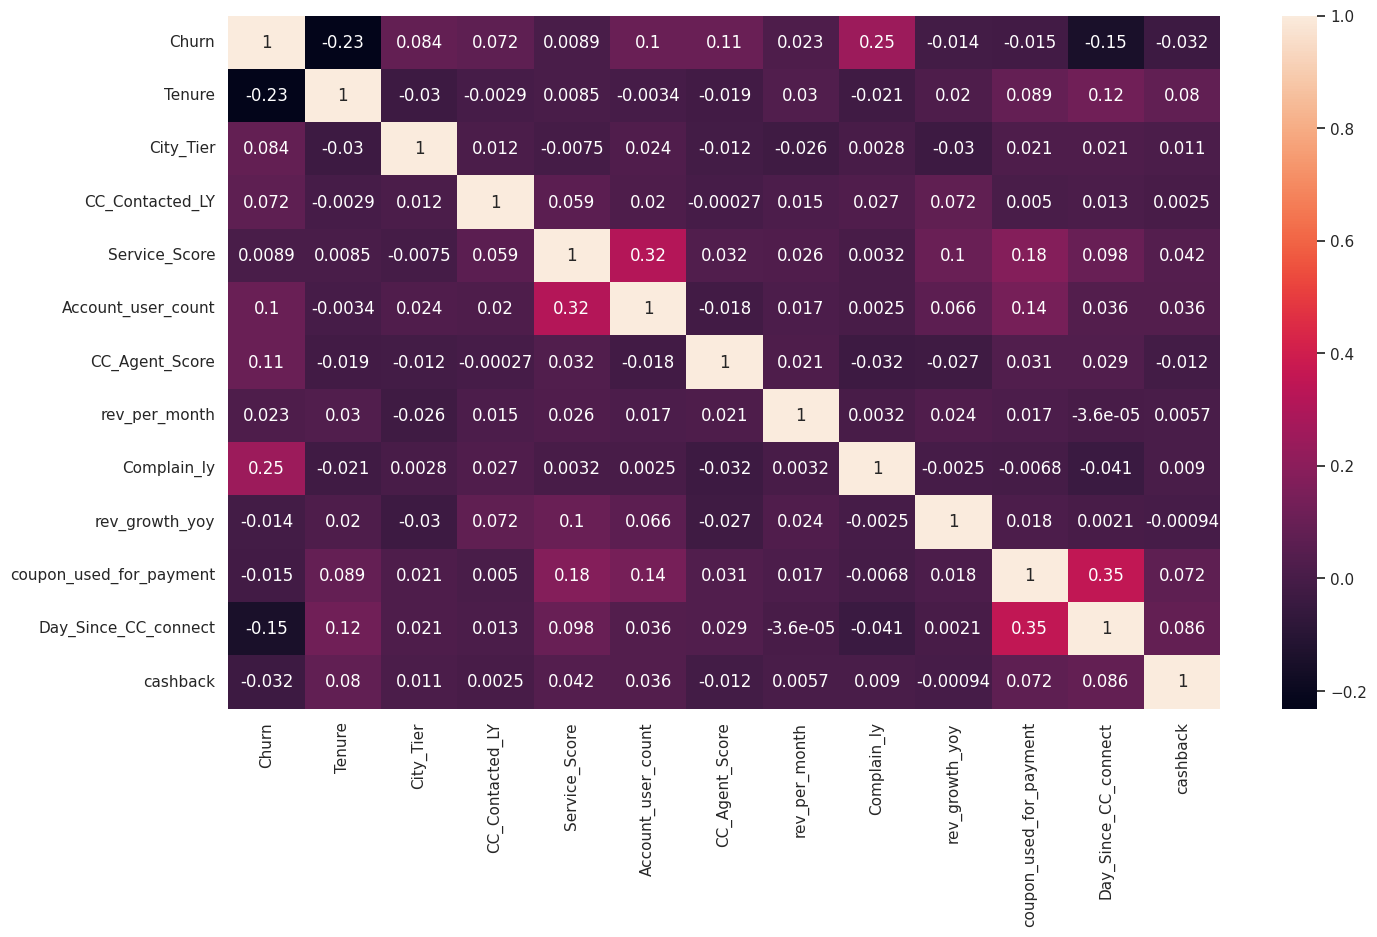

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)

### Handling Outliers

Text(0.5, 0, 'Variables that predict the customer churn')

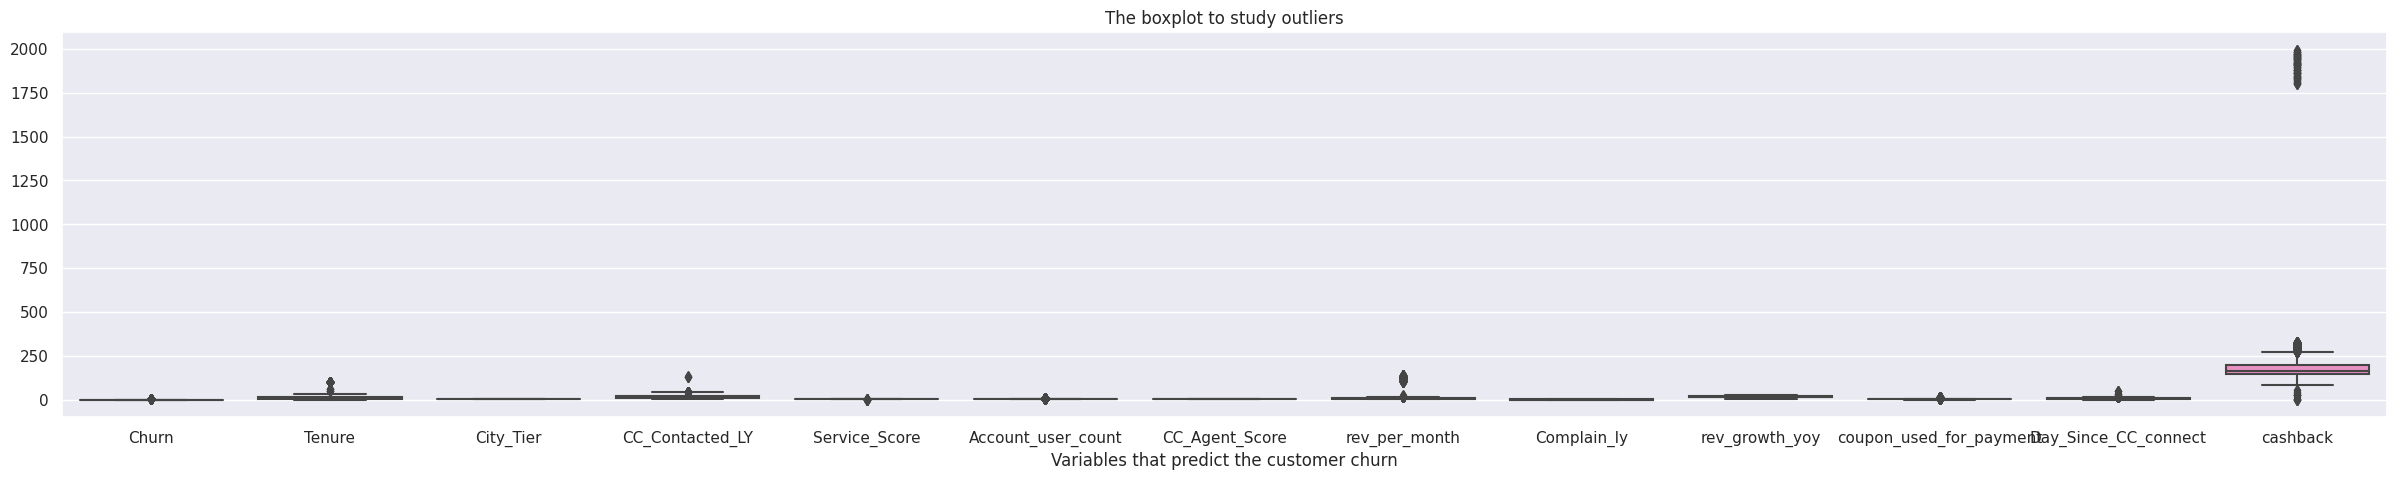

In [ ]:
plt.figure(figsize=(30,5))
sns.boxplot(data=data)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')

In [ ]:
# Creating a list of columns to impute missing values

cols_to_impute = [
    "Tenure",
    "City_Tier",
    "CC_Contacted_LY",
    "Payment",
    "Gender",
    "Service_Score",
    "Account_user_count",
    "account_segment",
    "CC_Agent_Score",
    "Marital_Status",
    "rev_per_month",
    "Complain_ly",
    "rev_growth_yoy",
    "coupon_used_for_payment",
    "Day_Since_CC_connect",
    "cashback",
    "Login_device",
]

In [ ]:
# Defining the value for 'n' neighbors

imputer = KNNImputer(n_neighbors=5)

In [ ]:

# Encoding categorical variables into numerical values to perform KNN imputation

payment = {
    "Debit Card": 0,
    "UPI": 1,
    "Credit Card": 2,
    "Cash on Delivery": 3,
    "E wallet": 4,
}
data["Payment"] = data["Payment"].map(payment)

gender = {"Female": 0, "Male": 1}
data["Gender"] = data["Gender"].map(gender)

account_segment = {
    "Super": 0,
    "Regular Plus": 1,
    "Regular": 2,
    "HNI": 3,
    "Super Plus": 4,
}
data["account_segment"] = data["account_segment"].map(account_segment)

marital_status = {"Single": 0, "Divorced": 1, "Married": 2}
data["Marital_Status"] = data["Marital_Status"].map(marital_status)

login_device = {"Mobile": 0, "Computer": 1, "Other": 2}
data["Login_device"] = data["Login_device"].map(login_device)

In [ ]:
# Data Preparation for Modeling
# Separating the dependent and independent variables

X = data.drop("Churn", axis=1)
y = data["Churn"]

In [ ]:
# Splitting the data into training, validation and test sets
# Splitting data into 2 parts, temporary and test sets

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Splitting the temporary set into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Testing set : ", X_test.shape)
print("\n Percentage of classes in training set : ")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in validation set : ")
print(y_val.value_counts(normalize=True))
print("\n Percentage of classes in test set : ")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (6756, 17)
Shape of Validation set :  (2252, 17)
Shape of Testing set :  (2252, 17)

 Percentage of classes in training set : 
0   0.83
1   0.17
Name: Churn, dtype: float64

 Percentage of classes in validation set : 
0   0.83
1   0.17
Name: Churn, dtype: float64

 Percentage of classes in test set : 
0   0.83
1   0.17
Name: Churn, dtype: float64


In [ ]:
# We have the classes of the dependent variable well balanced in all the three sets

### Missing Value Treatment

In [ ]:
# Checking the number of missing values in train, validation and test sets

print(X_train.isna().sum())
print("-" * 40)
print(X_val.isna().sum())
print("-" * 40)
print(X_test.isna().sum())

Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               316
dtype: int64
----------------------------------------
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_

In [ ]:
# Checking the number of missing values in train, validation and test sets

print(X_train.isna().sum())
print("-" * 40)
print(X_val.isna().sum())
print("-" * 40)
print(X_test.isna().sum())

Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               316
dtype: int64
----------------------------------------
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_

In [ ]:
# Function to inverse the encoding of categorical variables


def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(payment, "Payment")
inverse_mapping(gender, "Gender")
inverse_mapping(account_segment, "account_segment")
inverse_mapping(marital_status, "Marital_Status")
inverse_mapping(login_device, "Login_device")

In [ ]:
# Checking inverse mapped categorical values in train data

cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("-" * 40)

Debit Card          2836
Credit Card         2078
E wallet             729
Cash on Delivery     623
UPI                  490
Name: Payment, dtype: int64
----------------------------------------
Male      4096
Female    2660
Name: Gender, dtype: int64
----------------------------------------
Regular Plus    2503
Super           2498
HNI              970
Super Plus       486
Regular          299
Name: account_segment, dtype: int64
----------------------------------------
Married     3649
Single      2114
Divorced     993
Name: Marital_Status, dtype: int64
----------------------------------------
Mobile      4628
Computer    1812
Name: Login_device, dtype: int64
----------------------------------------


In [ ]:
# Checking inverse mapped categorical values in validation data

cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("-" * 40)

Debit Card          931
Credit Card         713
E wallet            261
Cash on Delivery    195
UPI                 152
Name: Payment, dtype: int64
----------------------------------------
Male      1351
Female     901
Name: Gender, dtype: int64
----------------------------------------
Super           835
Regular Plus    801
HNI             335
Super Plus      174
Regular         107
Name: account_segment, dtype: int64
----------------------------------------
Married     1238
Single       692
Divorced     322
Name: Marital_Status, dtype: int64
----------------------------------------
Mobile      1533
Computer     615
Name: Login_device, dtype: int64
----------------------------------------


### Feature Extraction

In [ ]:
# Interaction Variables
# Marital_Status and Gender

In [ ]:
def Married_M(df):
    if df["Marital_Status"] == "Married" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Married_M"] = X_train.apply(lambda X_train: Married_M(X_train), axis=1)
X_val["Married_M"] = X_val.apply(lambda X_val: Married_M(X_val), axis=1)
X_test["Married_M"] = X_test.apply(lambda X_test: Married_M(X_test), axis=1)


def Single_M(df):
    if df["Marital_Status"] == "Single" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Single_M"] = X_train.apply(lambda X_train: Single_M(X_train), axis=1)
X_val["Single_M"] = X_val.apply(lambda X_val: Single_M(X_val), axis=1)
X_test["Single_M"] = X_test.apply(lambda X_test: Single_M(X_test), axis=1)


def Divorced_M(df):
    if df["Marital_Status"] == "Divorced" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Divorced_M"] = X_train.apply(lambda X_train: Divorced_M(X_train), axis=1)
X_val["Divorced_M"] = X_val.apply(lambda X_val: Divorced_M(X_val), axis=1)
X_test["Divorced_M"] = X_test.apply(lambda X_test: Divorced_M(X_test), axis=1)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6756, 20) (2252, 20) (2252, 20)


In [ ]:
# Payment and Gender

In [ ]:
def COD_M(df):
    if df["Payment"] == "Cash on Delivery" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["COD_M"] = X_train.apply(lambda X_train: COD_M(X_train), axis=1)
X_val["COD_M"] = X_val.apply(lambda X_val: COD_M(X_val), axis=1)
X_test["COD_M"] = X_test.apply(lambda X_test: COD_M(X_test), axis=1)


def CC_M(df):
    if df["Payment"] == "Credit Card" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["CC_M"] = X_train.apply(lambda X_train: CC_M(X_train), axis=1)
X_val["CC_M"] = X_val.apply(lambda X_val: CC_M(X_val), axis=1)
X_test["CC_M"] = X_test.apply(lambda X_test: CC_M(X_test), axis=1)


def DC_M(df):
    if df["Payment"] == "Debit Card" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["DC_M"] = X_train.apply(lambda X_train: DC_M(X_train), axis=1)
X_val["DC_M"] = X_val.apply(lambda X_val: DC_M(X_val), axis=1)
X_test["DC_M"] = X_test.apply(lambda X_test: DC_M(X_test), axis=1)


def Ewallet_M(df):
    if df["Payment"] == "E wallet" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["Ewallet_M"] = X_train.apply(lambda X_train: Ewallet_M(X_train), axis=1)
X_val["Ewallet_M"] = X_val.apply(lambda X_val: Ewallet_M(X_val), axis=1)
X_test["Ewallet_M"] = X_test.apply(lambda X_test: Ewallet_M(X_test), axis=1)


def UPI_M(df):
    if df["Payment"] == "UPI" and df["Gender"] == "Male":
        return 1
    else:
        return 0


X_train["UPI_M"] = X_train.apply(lambda X_train: UPI_M(X_train), axis=1)
X_val["UPI_M"] = X_val.apply(lambda X_val: UPI_M(X_val), axis=1)
X_test["UPI_M"] = X_test.apply(lambda X_test: UPI_M(X_test), axis=1)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6756, 25) (2252, 25) (2252, 25)


### Feature Engineering

In [ ]:
# Label encoding the features Payment, account_segment and Login_device

le = LabelEncoder()

X_train["Payment"] = le.fit_transform(X_train["Payment"])
X_val["Payment"] = le.transform(X_val["Payment"])
X_test["Payment"] = le.transform(X_test["Payment"])

X_train["account_segment"] = le.fit_transform(X_train["account_segment"])
X_val["account_segment"] = le.transform(X_val["account_segment"])
X_test["account_segment"] = le.transform(X_test["account_segment"])

X_train["Login_device"] = le.fit_transform(X_train["Login_device"])
X_val["Login_device"] = le.transform(X_val["Login_device"])
X_test["Login_device"] = le.transform(X_test["Login_device"])

In [ ]:
# Creating dummy varibales for other categorical features

X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
# Checking the shape of data

print(X_train.shape, X_val.shape, X_test.shape)

(6756, 26) (2252, 26) (2252, 26)


In [ ]:
# Checking if the columns are properly encoded

X_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Married_M,Single_M,Divorced_M,COD_M,CC_M,DC_M,Ewallet_M,UPI_M,Gender_Male,Marital_Status_Married,Marital_Status_Single
4380,10.00,1.00,12.00,2,4.00,4,3,4.00,10,0.00,17,3,8.00,184.00,1,0,1,0,0,0,1,0,0,1,0,1
4221,12.00,1.00,36.00,2,3.00,4,3,1.00,3,0.00,12,7,3.00,149.00,0,0,0,0,0,0,0,0,0,0,0,1
4073,10.00,1.00,16.00,2,4.00,2,2,4.00,3,0.00,23,2,3.00,153.00,0,1,0,0,0,0,1,0,0,1,1,0
7246,10.00,1.00,40.00,2,2.00,3,0,4.00,6,1.00,14,4,9.00,218.00,0,1,0,0,0,0,1,0,0,1,1,0
6939,25.00,3.00,132.00,2,2.00,3,2,1.00,4,0.00,15,1,0.00,139.00,0,1,0,0,0,0,1,0,0,1,1,0


In [ ]:
# Model Evaluation Criterion
# User-defined functions to evaluate and plot metric scores

In [ ]:
# defining a function to compute different metrics to check performance of classification models built using sklearn


def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model : classifier
    predictors : independent variables
    target : dependent variable

    """
    # predicting using the independent variables
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0]
    )
    return df_perf

In [ ]:
# defining a function to plot the confusion matrix


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

In [ ]:
# K-Folds cross validation of model performances

models = []  # Empty list to store all the models

# Appending the models to the list
models.append(("LR", LogisticRegression(solver="newton-cg", random_state=1)))
models.append(("Dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all models' CV scores
names = []  # Empty list to store name of the models

# Looping through all the models to get the mean cross validated score
print("Cross-Validation Performance :\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting the number of splits to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{} : {}".format(name, cv_result.mean() * 100))

print("\nValidation set Performance :\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{} : {}".format(name, scores))

Cross-Validation Performance :

LR : 37.25983460854779
Dtree : 78.73946981992425
Bagging : 74.87402426771776
RandomForest : 79.96676713810959
Adaboost : 56.94489527784218
GBM : 58.61774480253498
XGBoost : 82.5129453589922

Validation set Performance :

LR : 41.952506596306065
Dtree : 84.69656992084433
Bagging : 84.1688654353562
RandomForest : 83.37730870712402
Adaboost : 59.894459102902374
GBM : 63.06068601583114
XGBoost : 87.0712401055409


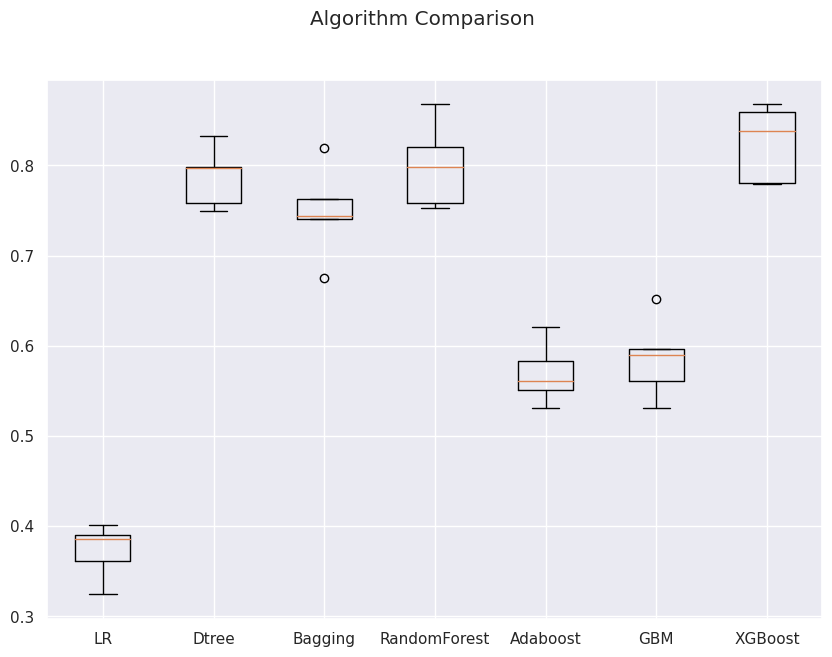

In [ ]:
# Plotting boxplots for CV scores of models defined above

fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# XGBoost is giving the highest mean cross-validated Recall followed by RandomForest, DecisionTree and Bagging classifiers
# All the above models are consistent without any outliers
# Highest validation set Recall achieved is 88 by XGBoost.
# Will build the above models, hypertune and stack them to get much better results

In [ ]:
# Decision Tree Classifier

In [ ]:
# Fitting the model
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.95    0.85       0.85 0.85 



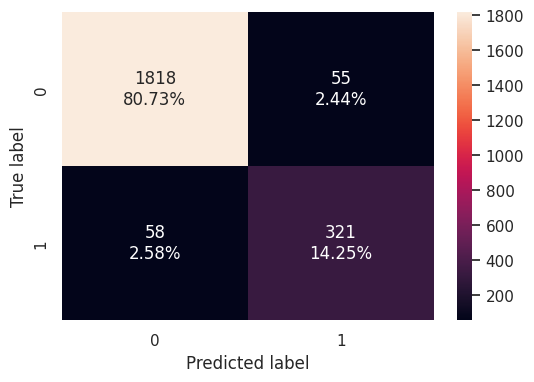

In [ ]:
# Calculating different metrics

print("Training Performance :")
dtree_train_perf = model_performance_classification(dtree, X_train, y_train)
print(dtree_train_perf)

print("\nValidation Performace :")
dtree_val_perf = model_performance_classification(dtree, X_val, y_val)
print(dtree_val_perf, "\n")

confusion_matrix_sklearn(dtree, X_val, y_val)

## Hyperparameter tuning

The model is overfitting the train data with default parameters will hypertune to reduce overfitting.

In [ ]:
# Choose the type of classifier
dtree_tuned = DecisionTreeClassifier(class_weight={0: 0.20, 1: 0.80}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
}

# Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring="recall", n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=4,
                       max_leaf_nodes=15, random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.83    0.80       0.49 0.61

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.83    0.79       0.50 0.61 



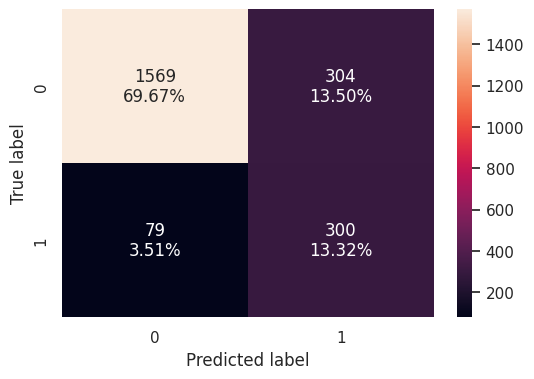

In [ ]:
# Calculating different metrics

print("Training Performance :")
dtree_tuned_train_perf = model_performance_classification(dtree_tuned, X_train, y_train)
print(dtree_tuned_train_perf)

print("\nValidation Performace :")
dtree_tuned_val_perf = model_performance_classification(dtree_tuned, X_val, y_val)
print(dtree_tuned_val_perf, "\n")

confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

## Bagging Classifier

The model is generalizing well with tuned parameters but with low metric scores.

In [ ]:
# Fitting the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    0.99       1.00 0.99

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.96    0.84       0.91 0.87 



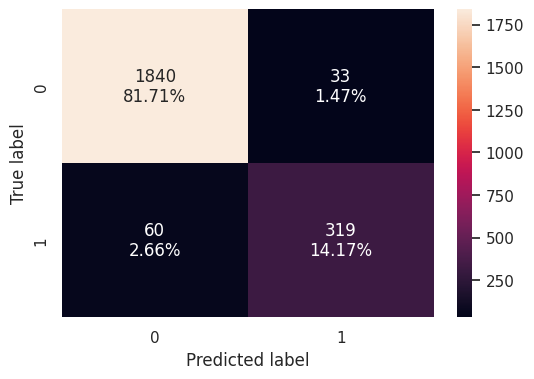

In [ ]:
# Calculating different metrics

print("Training Performance :")
bagging_train_perf = model_performance_classification(bagging, X_train, y_train)
print(bagging_train_perf)

print("\nValidation Performace :")
bagging_val_perf = model_performance_classification(bagging, X_val, y_val)
print(bagging_val_perf, "\n")

confusion_matrix_sklearn(bagging, X_val, y_val)

The model is overfitting the train set with default parameters, the bagging classifier is performing better in terms of Precision than Recall

In [ ]:
# Fitting the model with dtree_tuned as base_estimator
bagging_tdtree = BaggingClassifier(base_estimator=dtree_tuned, random_state=1)
bagging_tdtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        max_depth=4,
                                                        max_leaf_nodes=15,
                                                        random_state=1),
                  random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.85    0.79       0.54 0.65

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.86    0.80       0.56 0.66 



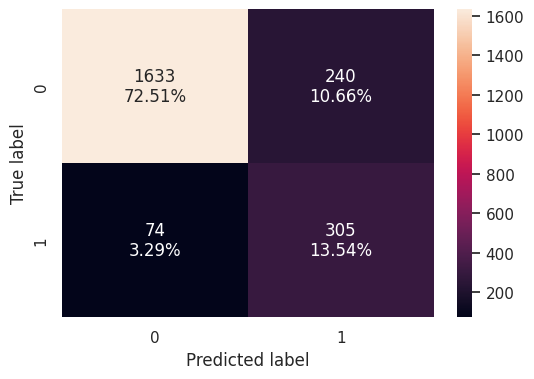

In [ ]:
# Calculating different metrics

print("Training Performance :")
bagging_tdtree_train_perf = model_performance_classification(
    bagging_tdtree, X_train, y_train
)
print(bagging_tdtree_train_perf)

print("\nValidation Performace :")
bagging_tdtree_val_perf = model_performance_classification(bagging_tdtree, X_val, y_val)
print(bagging_tdtree_val_perf, "\n")

confusion_matrix_sklearn(bagging_tdtree, X_val, y_val)

The model is generalizing well, but precision is too low. I will try to improve the scores by tuning this model

## Hyperparameter tuning

In [ ]:
# Choose the type of classifier
bagging_tuned_tdtree = BaggingClassifier(base_estimator=dtree_tuned, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": np.arange(0.2, 1, 0.1),
    "n_estimators": [40, 50, 60],
    "max_features": np.arange(0.2, 1, 0.1),
}

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned_tdtree, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
bagging_tuned_tdtree = grid_obj.best_estimator_

# Fit the best algorithm to the data
bagging_tuned_tdtree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        max_depth=4,
                                                        max_leaf_nodes=15,
                                                        random_state=1),
                  max_features=0.9000000000000001,
                  max_samples=0.9000000000000001, n_estimators=50,
                  random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.86    0.79       0.55 0.65

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.87    0.82       0.58 0.68 



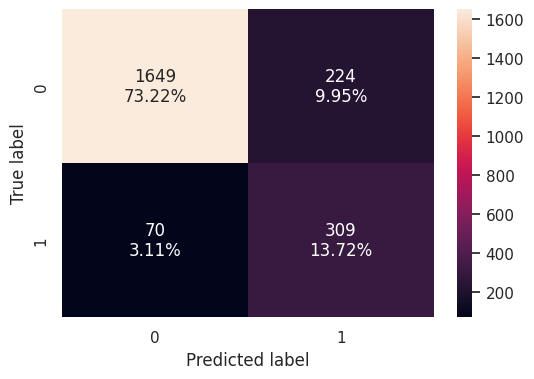

In [ ]:
# Calculating different metrics

print("Training Performance :")
bagging_tuned_tdtree_train_perf = model_performance_classification(
    bagging_tuned_tdtree, X_train, y_train
)
print(bagging_tuned_tdtree_train_perf)

print("\nValidation Performace :")
bagging_tuned_tdtree_val_perf = model_performance_classification(
    bagging_tuned_tdtree, X_val, y_val
)
print(bagging_tuned_tdtree_val_perf, "\n")

confusion_matrix_sklearn(bagging_tuned_tdtree, X_val, y_val)

<h5>Bagging classifier with tuned decision tree as base is a well fit model as it gives a consistent recall scores in train and test data

In [ ]:
# Choose the type of classifier
bagging_tuned_dt = BaggingClassifier(base_estimator=dtree, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": np.arange(0.2, 1, 0.1),
    "n_estimators": [60, 70, 80],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned_dt, parameters, scoring="recall", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
bagging_tuned_dt = grid_obj.best_estimator_

# Fit the best algorithm to the data
bagging_tuned_dt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, max_samples=0.9000000000000001,
                  n_estimators=70, random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.87       0.92 0.90 



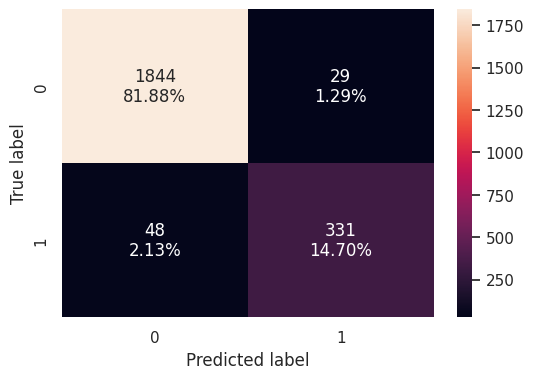

In [ ]:
# Calculating different metrics

print("Training Performance :")
bagging_tuned_dt_train_perf = model_performance_classification(
    bagging_tuned_dt, X_train, y_train
)
print(bagging_tuned_dt_train_perf)

print("\nValidation Performace :")
bagging_tuned_dt_val_perf = model_performance_classification(
    bagging_tuned_dt, X_val, y_val
)
print(bagging_tuned_dt_val_perf, "\n")

confusion_matrix_sklearn(bagging_tuned_dt, X_val, y_val)

## Random Forest Classifier

Model is overfit on the train data

Precision is much higher than Recall

In [ ]:
# Fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.83       0.97 0.90 



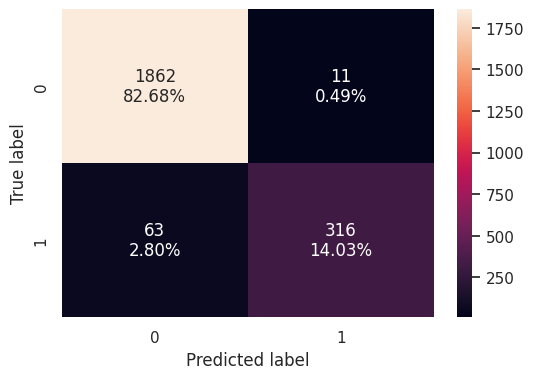

In [ ]:
# Calculating different metrics

print("Training Performance :")
rf_train_perf = model_performance_classification(rf, X_train, y_train)
print(rf_train_perf)

print("\nValidation Performace :")
rf_val_perf = model_performance_classification(rf, X_val, y_val)
print(rf_val_perf, "\n")

confusion_matrix_sklearn(rf, X_val, y_val)

<h4> Similar to the previous model performance, We tried tuning the model by adding class weights. </h4>

# Feature importance of Random Forest

In [ ]:
# Importance of features in the tree building

print(
    pd.DataFrame(
        rf.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Tenure                  0.23
cashback                0.08
Day_Since_CC_connect    0.07
CC_Contacted_LY         0.07
Complain_ly             0.06
rev_growth_yoy          0.06
rev_per_month           0.05
CC_Agent_Score          0.05
Account_user_count      0.04
account_segment         0.04
Payment                 0.04
coupon_used_for_payment 0.03
City_Tier               0.02
Login_device            0.02
Service_Score           0.02
Marital_Status_Single   0.02
Gender_Male             0.01
DC_M                    0.01
Marital_Status_Married  0.01
Single_M                0.01
CC_M                    0.01
COD_M                   0.01
Married_M               0.01
Ewallet_M               0.01
Divorced_M              0.01
UPI_M                   0.00


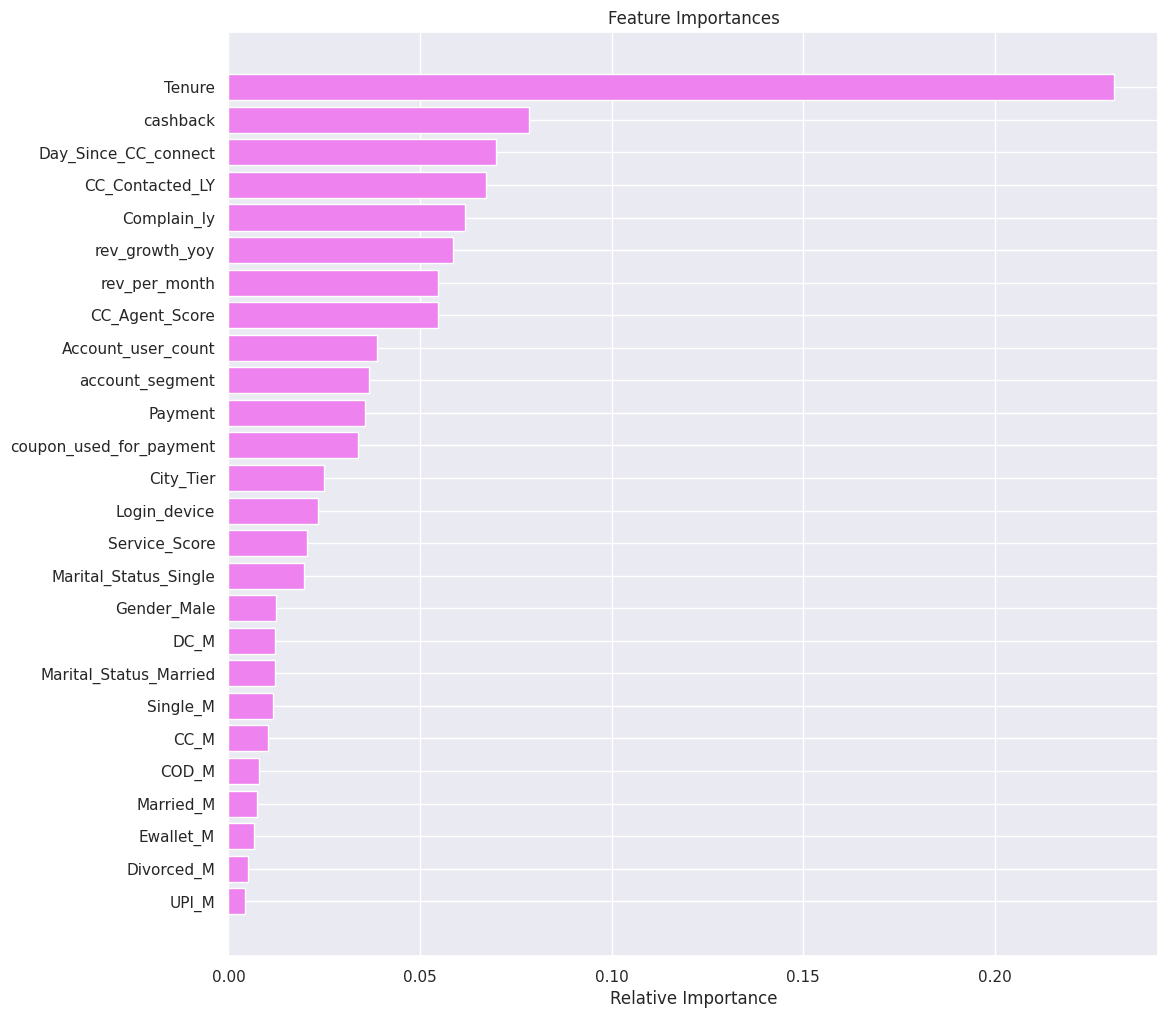

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<h3>Tenure is given the highest feature importance
<h4>Most of the newly created features have been given importance in model building with user_count_ss with much higher significance.</h4>

In [ ]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight={0: 17, 1: 83}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [206],
    "min_samples_leaf": [5, 6, 7],
    "max_samples": [0.5, 0.6, 0.7],
    "max_features": np.arange(0.2, 0.7, 0.1),
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring="recall", cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 17, 1: 83},
                       max_features=0.6000000000000001, max_samples=0.7,
                       min_samples_leaf=5, n_estimators=206, random_state=1)

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.96    0.96       0.84 0.89

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.93    0.88       0.75 0.81 



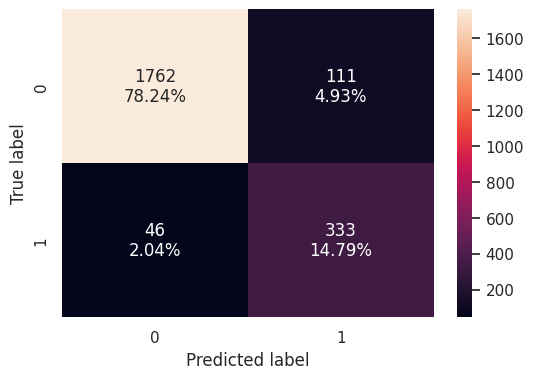

In [ ]:
# Calculating different metrics

print("Training Performance :")
rf_tuned_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
print(rf_tuned_train_perf)

print("\nValidation Performace :")
rf_tuned_val_perf = model_performance_classification(rf_tuned, X_val, y_val)
print(rf_tuned_val_perf, "\n")

confusion_matrix_sklearn(rf_tuned, X_val, y_val)


# XGBoost Classifier

Better performance on the train data

Not so generalized performance on the validation data

In [ ]:
# Fitting the model
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.87       0.92 0.90 



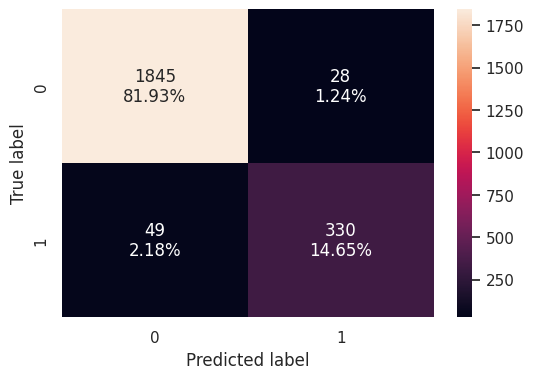

In [ ]:
# Calculating different metrics

print("Training Performance :")
xgb_train_perf = model_performance_classification(xgb, X_train, y_train)
print(xgb_train_perf)

print("\nValidation Performace :")
xgb_val_perf = model_performance_classification(xgb, X_val, y_val)
print(xgb_val_perf, "\n")

confusion_matrix_sklearn(xgb, X_val, y_val)

### Model is overfit on the train data
<h4>Precision much higher than Recall

# Hyperparameter tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [90],  # np.arange(10, 100, 10),
    "scale_pos_weight": [5],  # [0, 1, 2, 5],
    "subsample": [1],  # [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.2],  # [0.01, 0.1, 0.2, 0.05],
    "gamma": [3],  # [0, 1, 3],
    "colsample_bytree": [0.9],  # [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5],  # [0.5, 0.7, 0.9, 1],
}

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring="recall", cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.98    1.00       0.92 0.95

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.94    0.91       0.78 0.84 



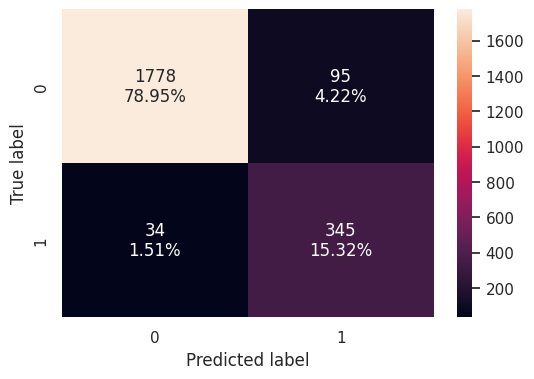

In [ ]:
# Calculating different metrics

print("Training Performance :")
xgb_tuned_train_perf = model_performance_classification(xgb_tuned, X_train, y_train)
print(xgb_tuned_train_perf)

print("\nValidation Performace :")
xgb_tuned_val_perf = model_performance_classification(xgb_tuned, X_val, y_val)
print(xgb_tuned_val_perf, "\n")

confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

### Model overfit on the train data
<h4>Highest Recall achieved so far

# Feature importance of XGBoost (Tuned)

In [ ]:
# Importance of features in the model building

print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Complain_ly             0.12
Tenure                  0.11
Marital_Status_Married  0.06
account_segment         0.06
UPI_M                   0.05
City_Tier               0.04
Day_Since_CC_connect    0.04
Marital_Status_Single   0.04
CC_Agent_Score          0.04
rev_per_month           0.04
COD_M                   0.03
Single_M                0.03
coupon_used_for_payment 0.03
Account_user_count      0.03
cashback                0.03
Payment                 0.03
Gender_Male             0.03
DC_M                    0.03
CC_M                    0.03
CC_Contacted_LY         0.03
rev_growth_yoy          0.02
Login_device            0.02
Ewallet_M               0.02
Married_M               0.02
Service_Score           0.02
Divorced_M              0.01


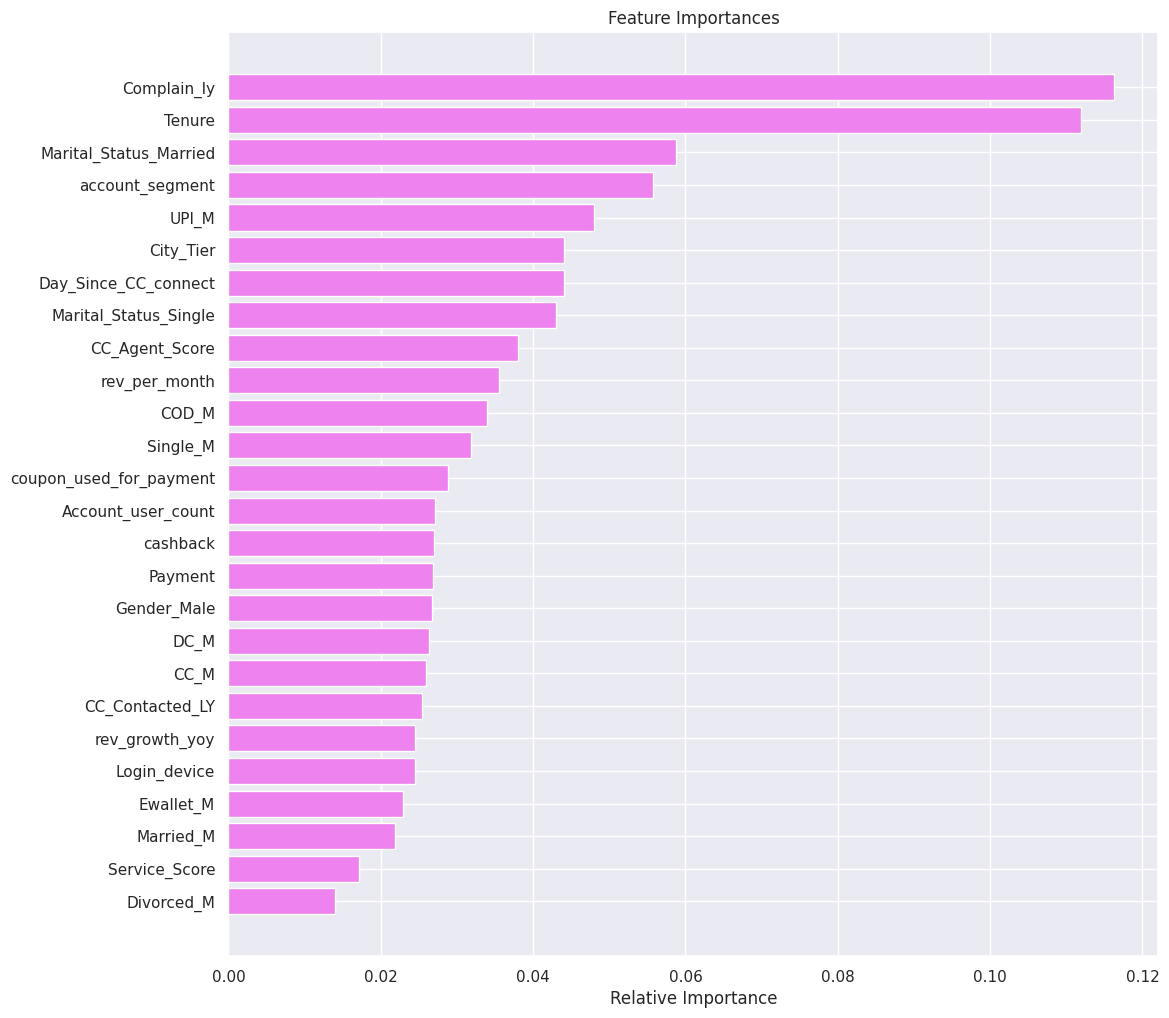

In [ ]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Tenure is given the highest importance
<h4> Each newly created feature has some significance in model building.</h4>

# Comparison of Train and Validation Performances

In [ ]:
# Training performance comparison
# Creating a dataframe of training scores

models_train_comp_df = pd.concat(
    [
        dtree_train_perf.T,
        dtree_tuned_train_perf.T,
        bagging_train_perf.T,
        bagging_tdtree_train_perf.T,
        bagging_tuned_tdtree_train_perf.T,
        bagging_tuned_dt_train_perf.T,
        rf_train_perf.T,
        rf_tuned_train_perf.T,
        xgb_train_perf.T,
        xgb_tuned_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging with default parameters",
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
    "Bagging Tuned with base dtree",
    "Random Forest",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned",
]

In [ ]:
# Validation performance comparison
# Creating a dataframe of validation scores

models_val_comp_df = pd.concat(
    [
        dtree_val_perf.T,
        dtree_tuned_val_perf.T,
        bagging_val_perf.T,
        bagging_tdtree_val_perf.T,
        bagging_tuned_tdtree_val_perf.T,
        bagging_tuned_dt_val_perf.T,
        rf_val_perf.T,
        rf_tuned_val_perf.T,
        xgb_val_perf.T,
        xgb_tuned_val_perf.T,
    ],
    axis=1,
)

models_val_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging with default parameters",
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
    "Bagging Tuned with dtree",
    "Random Forest",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned",
]

In [ ]:
print("Training performance comparison :")
models_train_comp_df

Training performance comparison :


,Decision Tree,Decision Tree Tuned,Bagging with default parameters,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned,Bagging Tuned with base dtree,Random Forest,Random Forest Tuned,XGBoost,XGBoost Tuned
Accuracy,1.00,0.83,1.00,0.85,0.86,1.00,1.00,0.96,1.00,0.98
Recall,1.00,0.80,0.99,0.79,0.79,1.00,1.00,0.96,1.00,1.00
Precision,1.00,0.49,1.00,0.54,0.55,1.00,1.00,0.84,1.00,0.92
F1,1.00,0.61,0.99,0.65,0.65,1.00,1.00,0.89,1.00,0.95


In [ ]:
print("Validation performance comparison :")
models_val_comp_df

Validation performance comparison :


,Decision Tree,Decision Tree Tuned,Bagging with default parameters,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned,Bagging Tuned with dtree,Random Forest,Random Forest Tuned,XGBoost,XGBoost Tuned
Accuracy,0.95,0.83,0.96,0.86,0.87,0.97,0.97,0.93,0.97,0.94
Recall,0.85,0.79,0.84,0.80,0.82,0.87,0.83,0.88,0.87,0.91
Precision,0.85,0.50,0.91,0.56,0.58,0.92,0.97,0.75,0.92,0.78
F1,0.85,0.61,0.87,0.66,0.68,0.90,0.90,0.81,0.90,0.84


* Decision tree, Bagging and Random forest models with default parameters are overfit
* Tuned decision tree is giving a generalized performance
* Tuned bagging classifier with dtree_tuned as base estimator is generalizing well
* Tuned random forest is also overfit
* Tuned xgboost model is giving much higher recall than the model with default parameters</h5>

# Best Individual Models

In [ ]:
# Training performance comparison
# Creating a dataframe of training scores

best_models_train_comp_df = pd.concat(
    [bagging_tdtree_train_perf.T, bagging_tuned_tdtree_train_perf.T,], axis=1,
)

best_models_train_comp_df.columns = [
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
]

# Validation performance comparison
# Creating a dataframe of training scores

best_models_val_comp_df = pd.concat(
    [bagging_tdtree_val_perf.T, bagging_tuned_tdtree_val_perf.T,], axis=1,
)

best_models_val_comp_df.columns = [
    "Bagging with base dtree_tuned",
    "Bagging Tuned with base dtree_tuned",
]

In [ ]:
print("Training performance comparison :")
best_models_train_comp_df

Training performance comparison :


,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned
Accuracy,0.85,0.86
Recall,0.79,0.79
Precision,0.54,0.55
F1,0.65,0.65


In [ ]:
print("Validation performance comparison :")
best_models_val_comp_df

Validation performance comparison :


,Bagging with base dtree_tuned,Bagging Tuned with base dtree_tuned
Accuracy,0.86,0.87
Recall,0.80,0.82
Precision,0.56,0.58
F1,0.66,0.68


<h4>Both these models are generalizing well on the train and validation sets
<br> Highest Recall achieved is 84 by Bagging Classifier with tuned decision tree as base estimator.</h4>

### Stacking Classifier
* We build stacking models with combinations of above models with tuned xgboost model as the final estimator to achieve higher Recall with good Precision scores.

<h4> Compare the stacking model performances to identify the best model.</h4>

### Stacking 1

In [ ]:
# Building a stacking classifier with the best individual models

estimators1 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging Tuned with base dtree_tuned", bagging_tuned_tdtree),
]
final_estimator = xgb_tuned

stacking_classifier1 = StackingClassifier(
    estimators=estimators1, final_estimator=final_estimator
)
stacking_classifier1.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=4,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging Tuned with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=4,
                                                                                        max_leaf_node...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=90, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.83    0.79       0.51 0.62

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.85    0.81       0.53 0.64


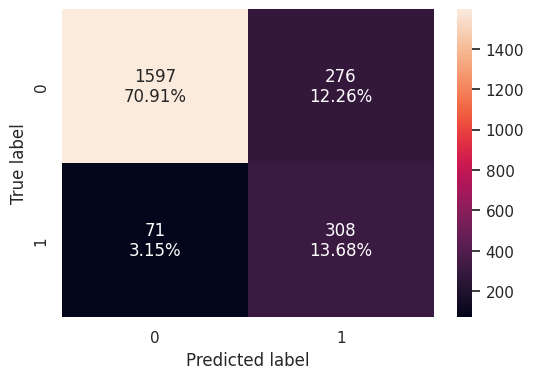

In [ ]:
# Calculating different metrics

print("Training Performance :")
stacking1_train_perf = model_performance_classification(
    stacking_classifier1, X_train, y_train
)
print(stacking1_train_perf)

print("\nValidation Performace :")
stacking1_val_perf = model_performance_classification(
    stacking_classifier1, X_val, y_val
)
print(stacking1_val_perf)

confusion_matrix_sklearn(stacking_classifier1, X_val, y_val)

<h4> Model is generalizing well on both train and validation sets</h3>
<h4>However, the Precision is too low.</h4>

### Stacking 2

In [ ]:
# Building a stacking classifier with the best individual models and bagging classifier
# with default parameters, as it gave higher Recall and Precision scores

estimators2 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging with default parameters", bagging),
    ("Bagging Tuned with base dtree_tuned", bagging_tuned_tdtree),
]
final_estimator = xgb_tuned

stacking_classifier2 = StackingClassifier(
    estimators=estimators2, final_estimator=final_estimator
)
stacking_classifier2.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=4,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging with default parameters',
                                BaggingClassifier(random_state=1)),
                               ('Bagging Tuned with base dtree_tuned',
                                BaggingClassifier(base_estimator=Decision...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=90, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training Performance :
   Accuracy  Recall  Precision   F1
0      0.99    1.00       0.96 0.98

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.95    0.93       0.79 0.85


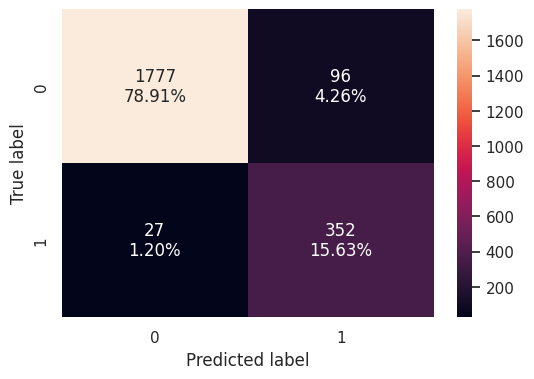

In [ ]:
# Calculating different metrics

print("Training Performance :")
stacking2_train_perf = model_performance_classification(
    stacking_classifier2, X_train, y_train
)
print(stacking2_train_perf)

print("\nValidation Performace :")
stacking2_val_perf = model_performance_classification(
    stacking_classifier2, X_val, y_val
)
print(stacking2_val_perf)

confusion_matrix_sklearn(stacking_classifier2, X_val, y_val)

### Model overfit on train data
<h4>Highest Recall on validation so far
<br> Precision has improved comparatively</h4>

### Stacking 3

In [ ]:
# Building a stacking classifier with tuned bagging classifier having
# decision tree as the base estimator

estimators3 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging with default parameters", bagging),
    ("Bagging Tuned with base dtree", bagging_tuned_dt),
]
final_estimator = xgb_tuned

stacking_classifier3 = StackingClassifier(
    estimators=estimators3, final_estimator=final_estimator
)
stacking_classifier3.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=4,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging with default parameters',
                                BaggingClassifier(random_state=1)),
                               ('Bagging Tuned with base dtree',
                                BaggingClassifier(base_estimator=DecisionTreeCl...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=90, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       0.99 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.96    0.94       0.83 0.88


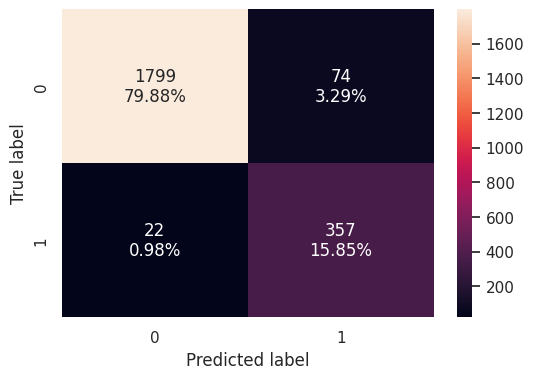

In [ ]:
# Calculating different metrics

print("Training Performance :")
stacking3_train_perf = model_performance_classification(
    stacking_classifier3, X_train, y_train
)
print(stacking3_train_perf)

print("\nValidation Performace :")
stacking3_val_perf = model_performance_classification(
    stacking_classifier3, X_val, y_val
)
print(stacking3_val_perf)

confusion_matrix_sklearn(stacking_classifier3, X_val, y_val)

<h4>Highest Recall score so far. However, model is much overfit on Precision comparatively

### Stacking 4
<h4>Stacking the above model with random forest classifier with base estimators in order to get a better Precision score

In [ ]:
estimators4 = [
    ("Bagging with base dtree_tuned", bagging_tdtree),
    ("Bagging with default parameters", bagging),
    ("Bagging Tuned with base dtree", bagging_tuned_dt),
    ("Random Forest", rf),
]
final_estimator = xgb_tuned

stacking_classifier4 = StackingClassifier(
    estimators=estimators4, final_estimator=final_estimator
)
stacking_classifier4.fit(X_train, y_train)

StackingClassifier(estimators=[('Bagging with base dtree_tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                                                      1: 0.8},
                                                                                        max_depth=4,
                                                                                        max_leaf_nodes=15,
                                                                                        random_state=1),
                                                  random_state=1)),
                               ('Bagging with default parameters',
                                BaggingClassifier(random_state=1)),
                               ('Bagging Tuned with base dtree',
                                BaggingClassifier(base_estimator=DecisionTreeCl...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=90, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.95       0.90 0.92


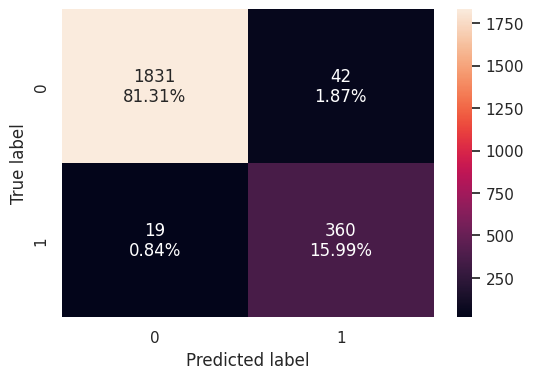

In [ ]:
# Calculating different metrics

print("Training Performance :")
stacking4_train_perf = model_performance_classification(
    stacking_classifier4, X_train, y_train
)
print(stacking4_train_perf)

print("\nValidation Performace :")
stacking4_val_perf = model_performance_classification(
    stacking_classifier4, X_val, y_val
)
print(stacking4_val_perf)

confusion_matrix_sklearn(stacking_classifier4, X_val, y_val)

<h3>Model overfit on train data
<h4>However, really good Recall and highest Precision score so far

### Comparison of Stacking Model Performances

## Training performance comparison
##### Creating a dataframe of training scores


In [ ]:
stack_models_train_comp_df = pd.concat(
    [
        stacking1_train_perf.T,
        stacking2_train_perf.T,
        stacking3_train_perf.T,
        stacking4_train_perf.T,
    ],
    axis=1,
)

stack_models_train_comp_df.columns = [
    "Stacking_Classifier1",
    "Stacking_Classifier2",
    "Stacking_Classifier3",
    "Stacking_Classifier4",
]


#### Creating a dataframe of validation scores

In [ ]:


stack_models_val_comp_df = pd.concat(
    [
        stacking1_val_perf.T,
        stacking2_val_perf.T,
        stacking3_val_perf.T,
        stacking4_val_perf.T,
    ],
    axis=1,
)

stack_models_val_comp_df.columns = [
    "Stacking_Classifier1",
    "Stacking_Classifier2",
    "Stacking_Classifier3",
    "Stacking_Classifier4",
]

In [ ]:
print("Stacking models Training performance comparison :")
stack_models_train_comp_df

Stacking models Training performance comparison :


,Stacking_Classifier1,Stacking_Classifier2,Stacking_Classifier3,Stacking_Classifier4
Accuracy,0.83,0.99,1.00,1.00
Recall,0.79,1.00,1.00,1.00
Precision,0.51,0.96,0.99,1.00
F1,0.62,0.98,1.00,1.00


In [ ]:
print("Stacking models Validation performance comparison :")
stack_models_val_comp_df

Stacking models Validation performance comparison :


,Stacking_Classifier1,Stacking_Classifier2,Stacking_Classifier3,Stacking_Classifier4
Accuracy,0.85,0.95,0.96,0.97
Recall,0.81,0.93,0.94,0.95
Precision,0.53,0.79,0.83,0.90
F1,0.64,0.85,0.88,0.92


* Stacking_CLassifier1 is generalizing well but, very low metric scores
* Stacking_Classifier2 gives a good Recall but the Precision is very low comparatively
* Stacking_Classifier3 gives the highest Recall however, it is much overfit on Precision
* Stacking_Classifier4 is a little overfit on the train set however, the Recall and Precision are really good
#### Hence, I conclude Stacking_Classifier4 as my best model

# Best Model - Performance

Training Performance :
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00

Validation Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.95       0.90 0.92

Test Performace :
   Accuracy  Recall  Precision   F1
0      0.97    0.93       0.88 0.90


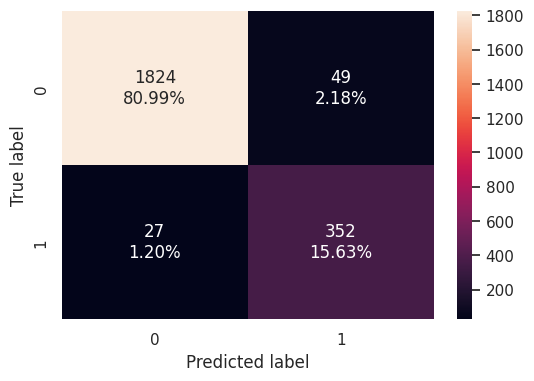

In [ ]:
# Calculating different metrics for the best model across
# Train, Validation and Test sets

print("Training Performance :")
stacking4_train_perf = model_performance_classification(
    stacking_classifier4, X_train, y_train
)
print(stacking4_train_perf)

print("\nValidation Performace :")
stacking4_val_perf = model_performance_classification(
    stacking_classifier4, X_val, y_val
)
print(stacking4_val_perf)

print("\nTest Performace :")
stacking4_test_perf = model_performance_classification(
    stacking_classifier4, X_test, y_test
)
print(stacking4_test_perf)

confusion_matrix_sklearn(stacking_classifier4, X_test, y_test)

 Business Insights and Recommendations

1.   The business can use this model to identify customers who may churn
2.   Top five features that drive the attrition are Tenure, Complain_ly, Marital_Status_Single, account_segment and Single_M
3.  Business may provide introductory offers to attract new customers and exclusive offers to existing new customers
4. Customer care team must make additional efforts to solve customer complaints at the earliest as majority of customers who raised a complaint in the past year has churned. Follow-up calls are recommended.
5. Marketing team can target Single/M customers with special discounts on paid channels and/or movies to customers from Regular Plus, Super and Super Plus segments
6.  Provide targeted offers to Female customers who prefer E-wallet/Mobile, from the Regular account segments
7. Also provide exclusive family offers for Married customers from HNI segment as churn rate is higher among them
8. Business may consider increasing the cashback to Regular Plus customers and Debit card payment in order to reduce the churn
9. Exit interview can be conducted to get feedback from outgoing customers and work towards the betterment of the services provided


